In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from common import *
from preprocess import base
from analysis import integrate

from scipy.signal import savgol_filter

% matplotlib inline

In [2]:
root_dir = os.getcwd()

In [163]:
def plot_data(df, title):
    ax = df.plot(figsize=(12,2))
    ax.set_title(title)
    ax.legend(loc='best')

def original_temp(data_dir, win_rate = 0.3, normalization=False):
    filelist = base.get_files_csv(data_dir)
    for file in filelist:
        path = data_dir + file
        df= integrate.get_temp_mean(path)
        if normalization:
            df = (df-df.mean())/(df.std())
        plot_data(df, file)
        plt.figure(figsize=(12,2))
        corr = np.array(integrate.get_piece_corr_rolling(df, int(len(df)*win_rate)))
        corr -= 1
        plt.plot(corr)
        plt.title("similarity")
        plt.ylim((0, 1))
        

def savgol_(data, seg_size=101, order=4):
    names = list(data.columns)
    for name in names:
        data[name] = savgol_filter(data[name], seg_size, order)
    return data

def plot_savol_filter(data_dir):
    filelist = base.get_files_csv(data_dir)
    for file in filelist:
        path = data_dir + file
        df = integrate.get_temp_mean(path)
        #df = (df-df.mean())/(df.std())
        seg_size = int(len(df)*0.3)
        if seg_size % 2 == 0:
            seg_size += 1
        df = savgol_(df, seg_size=seg_size, order=4)
        plot_data(df, file)
        plt.figure(figsize=(12,2))
        #corr = np.array(integrate.get_piece_corr_segment(df, int(len(df)*0.2)))
        corr = np.array(integrate.get_piece_corr_rolling(df, int(len(df)*0.4)))
        corr -= 1;
        plt.plot(corr,'-o')
        #plt.plot(integrate.get_piece_corr_rolling(df, int(len(df)*0.05)))
        plt.title("similarity")
        plt.ylim((0,1))

/home/happyling/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


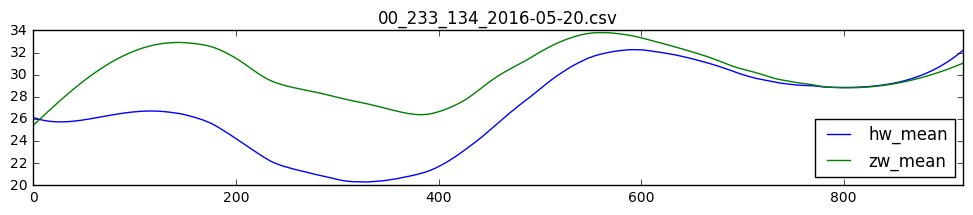

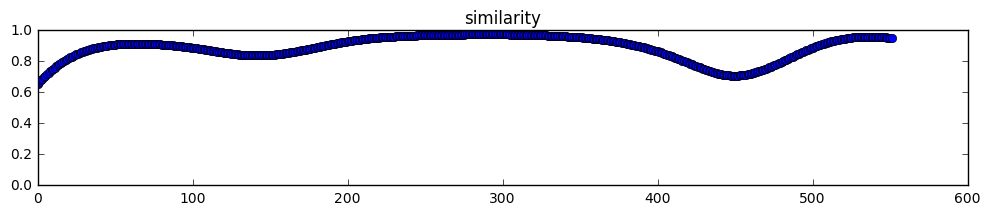

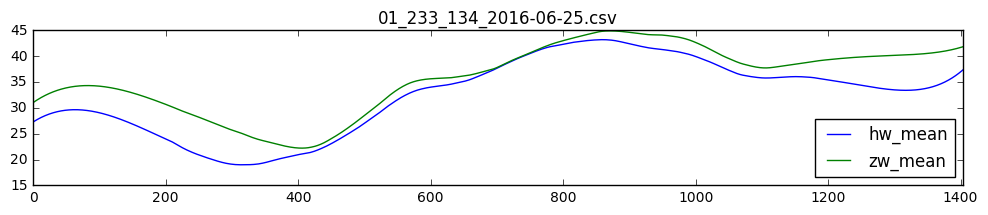

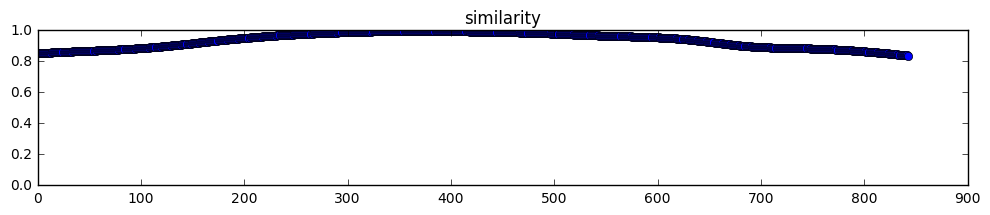

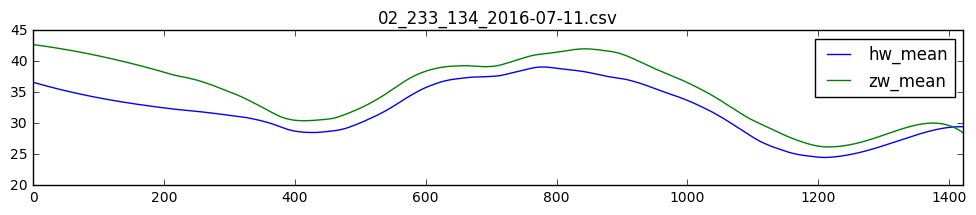

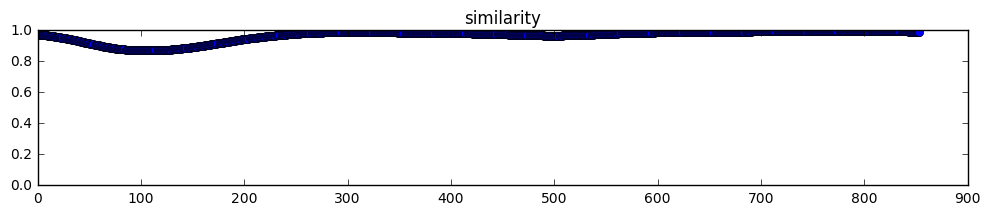

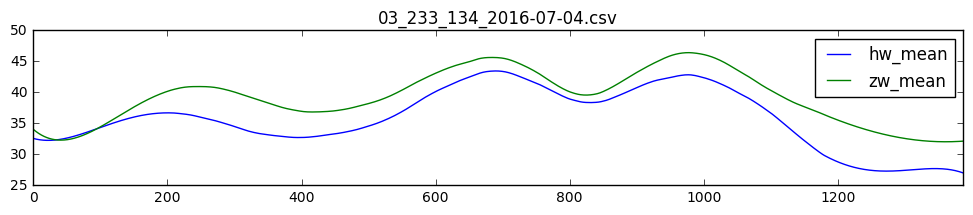

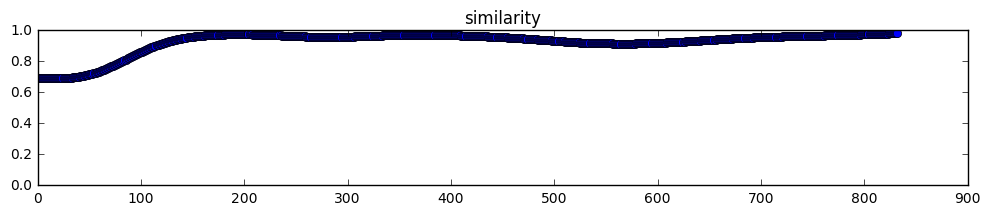

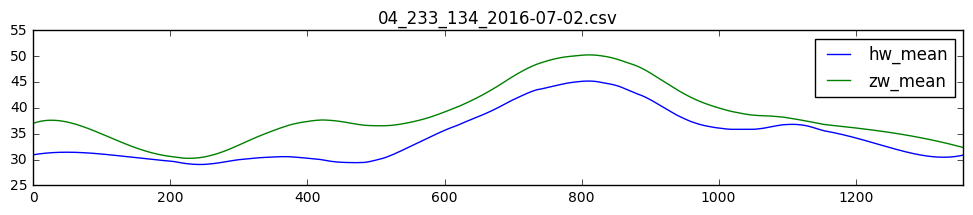

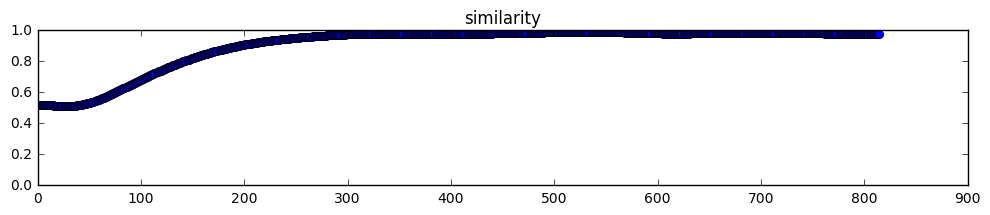

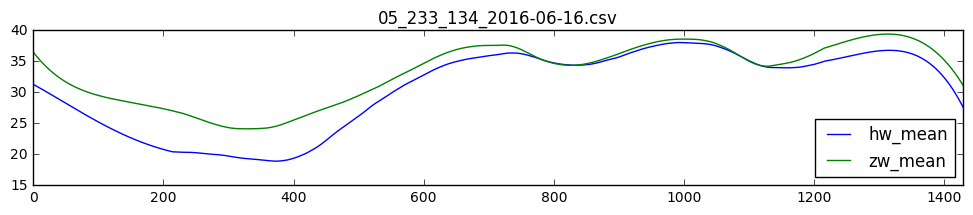

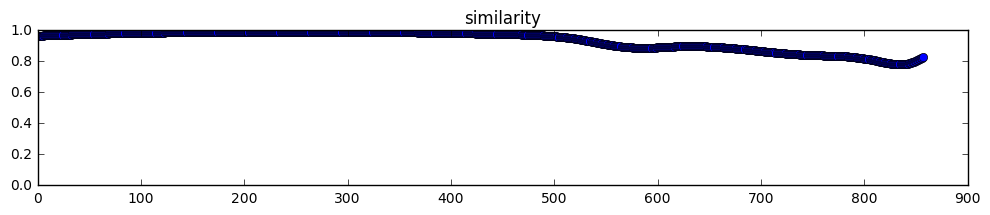

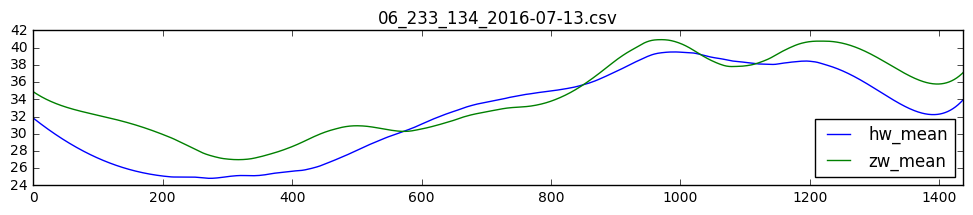

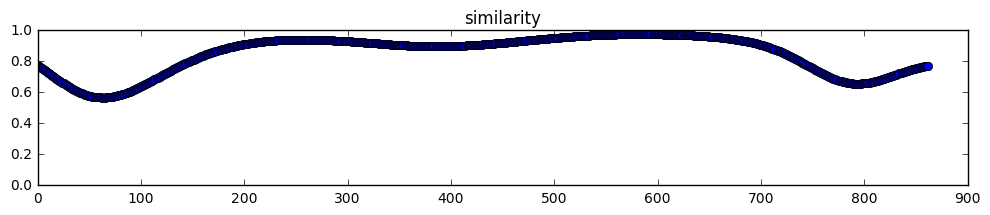

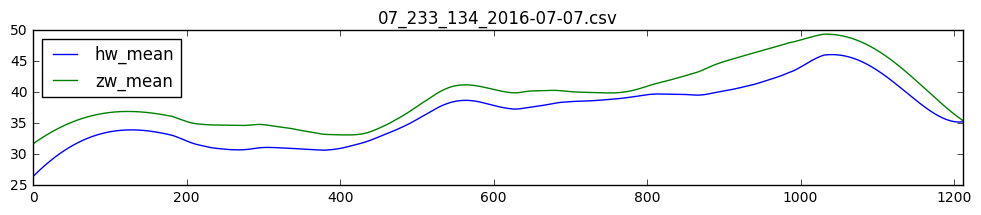

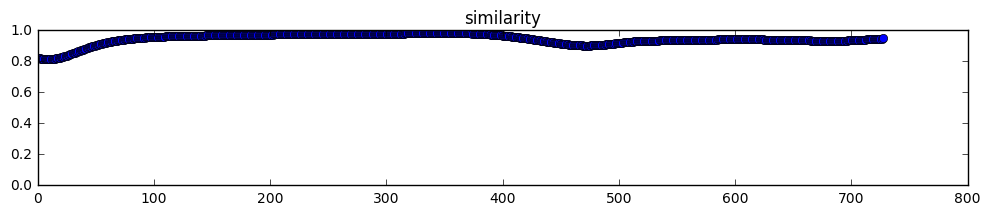

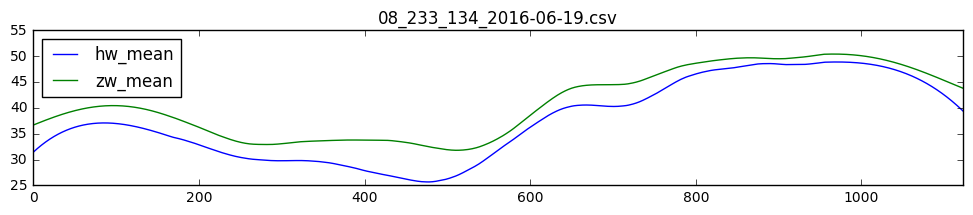

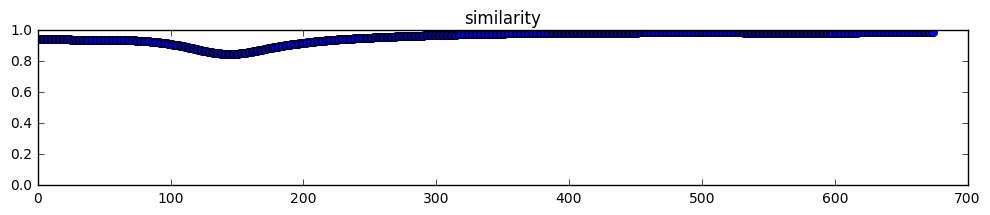

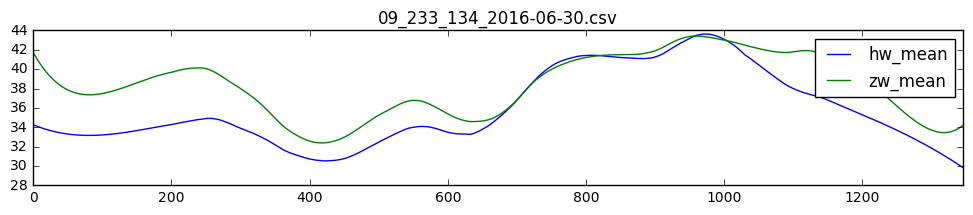

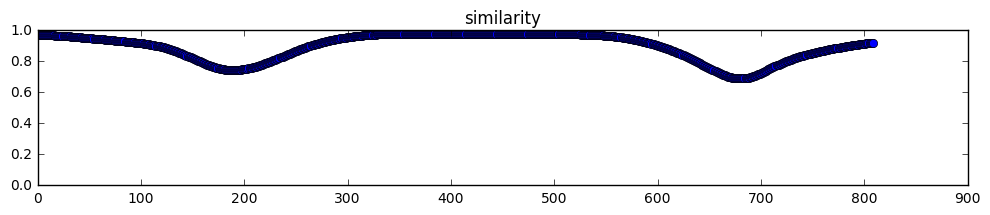

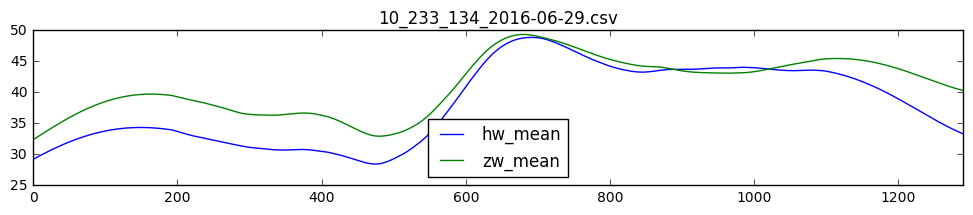

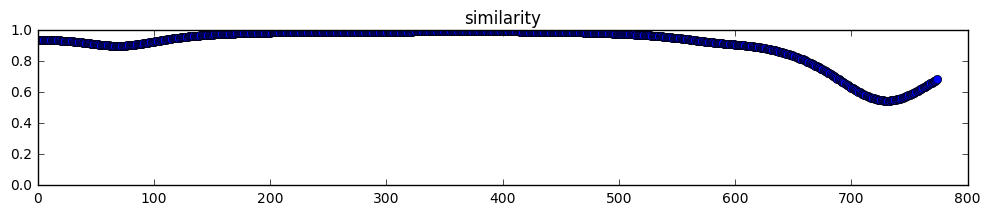

In [101]:
data_dir = root_dir + "/data_0134/smooth_mean_interpolate_bin_mean/"
plot_savol_filter(data_dir)

#### Work with original data no normalization

/home/happyling/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


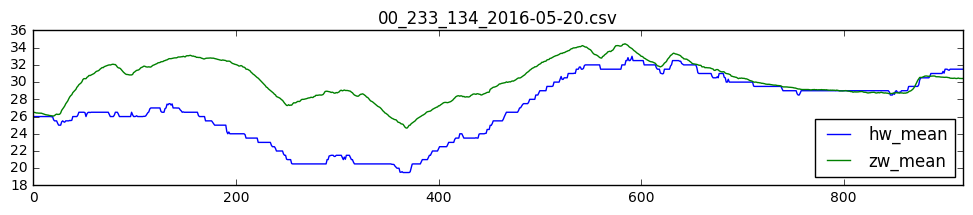

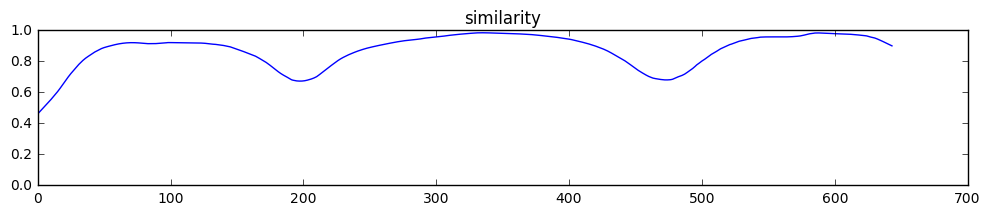

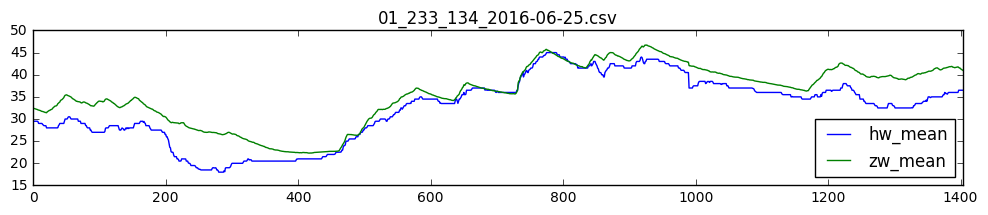

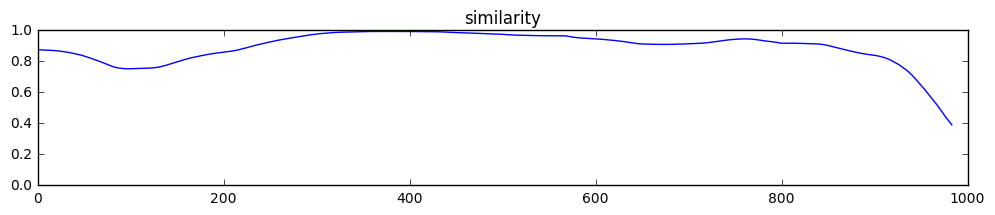

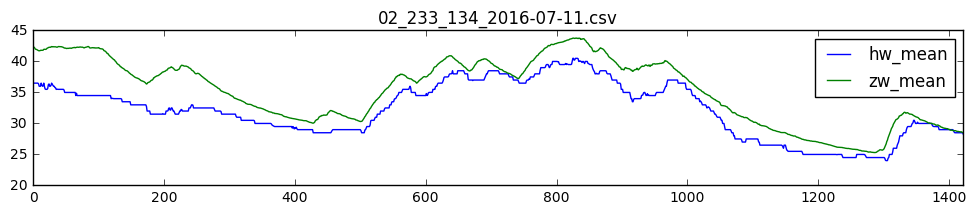

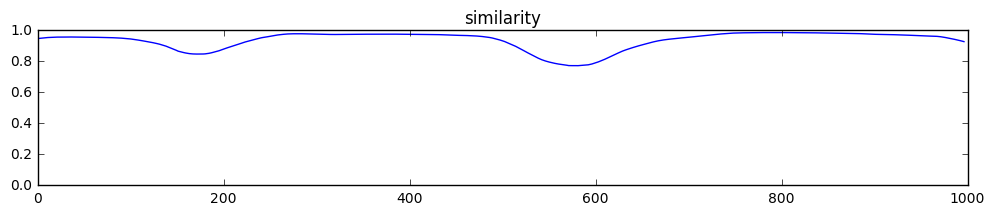

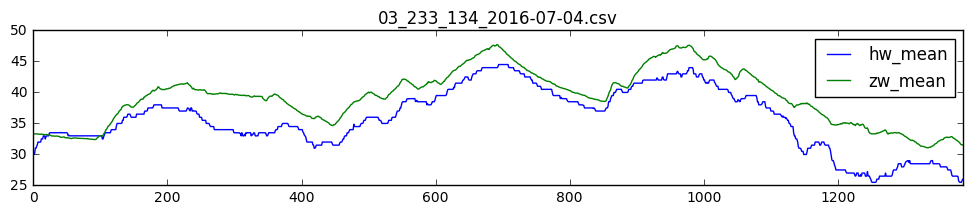

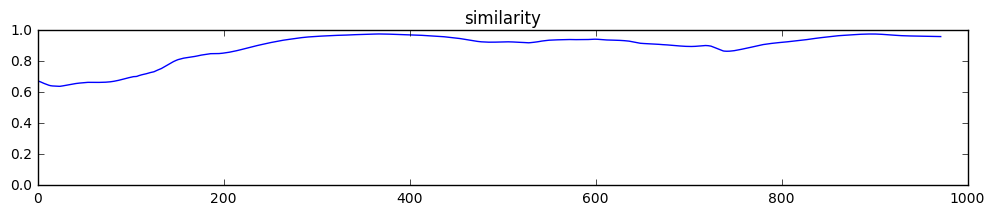

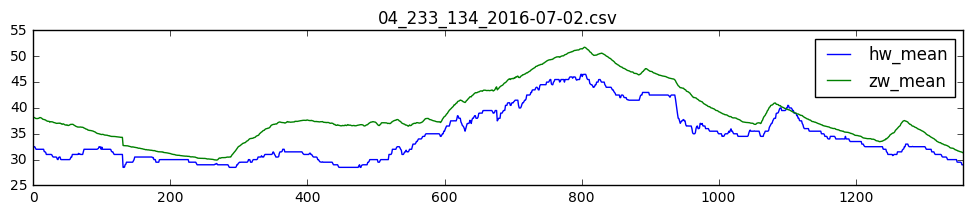

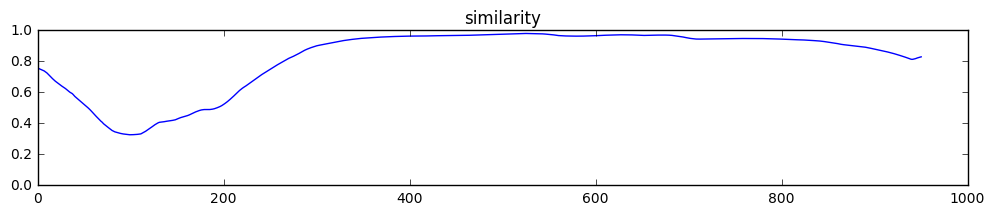

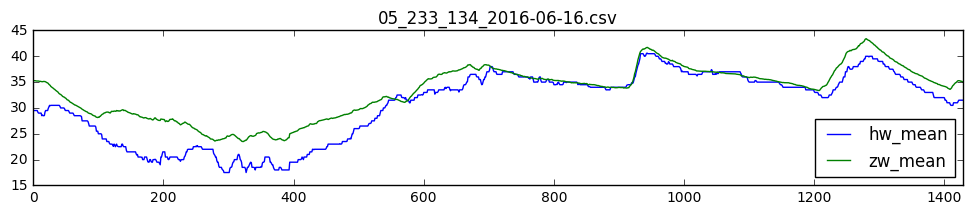

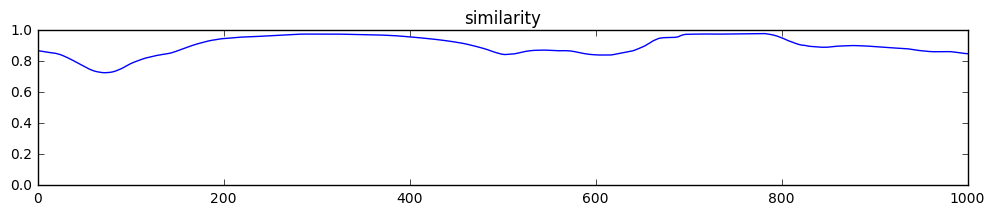

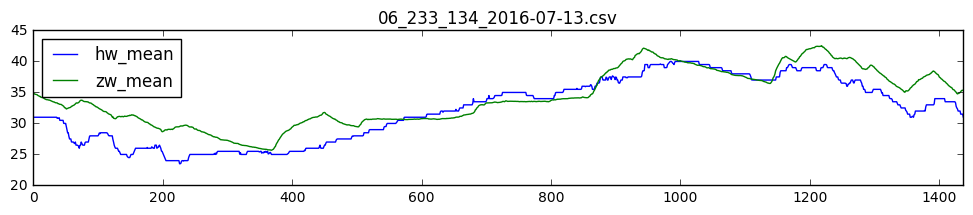

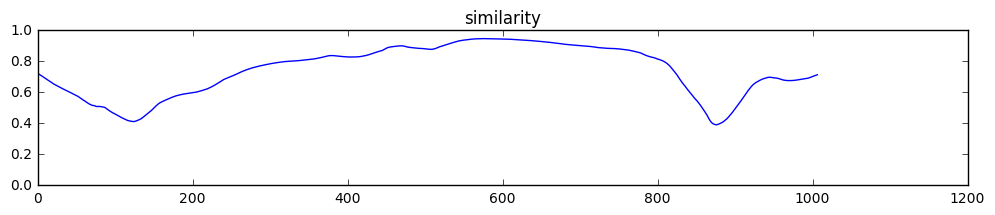

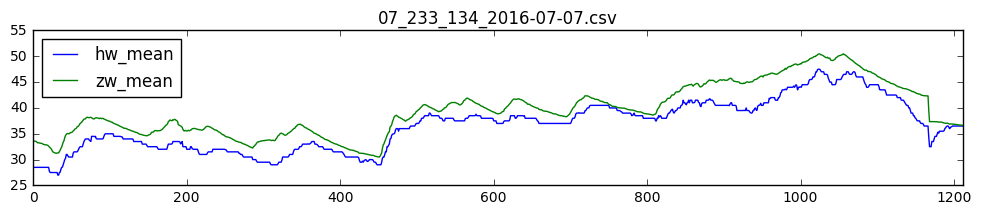

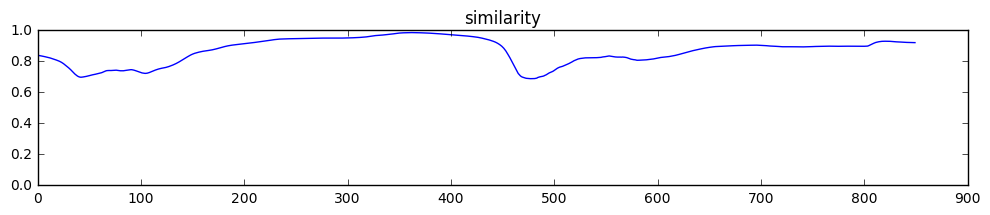

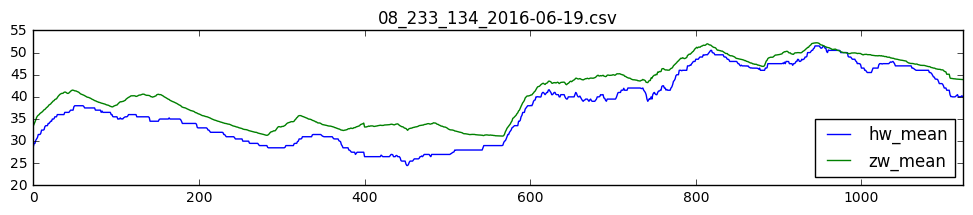

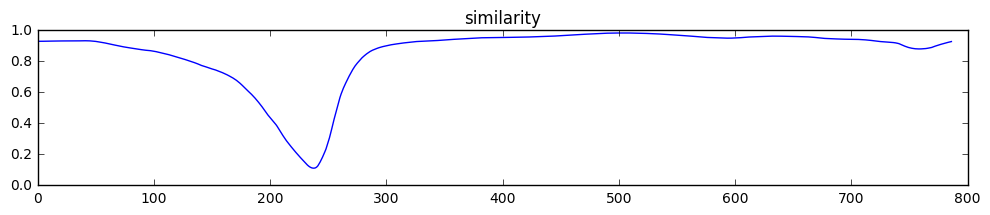

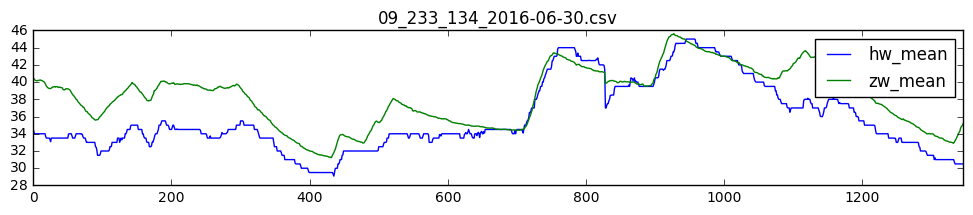

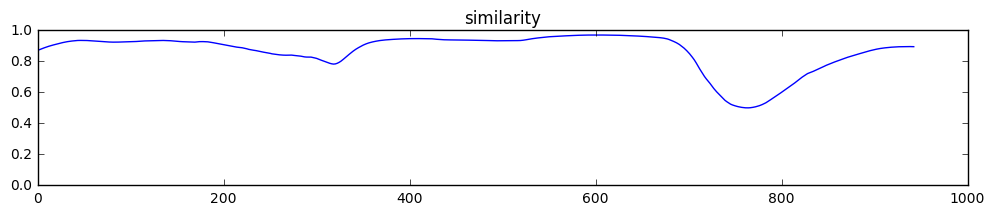

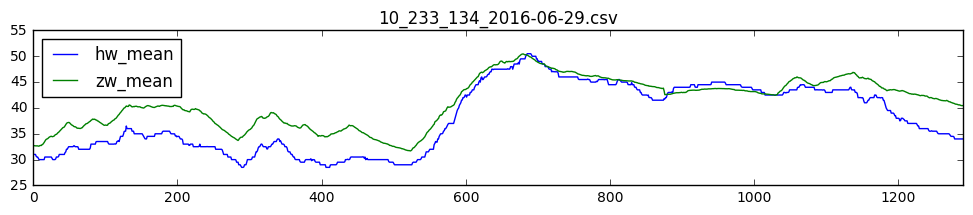

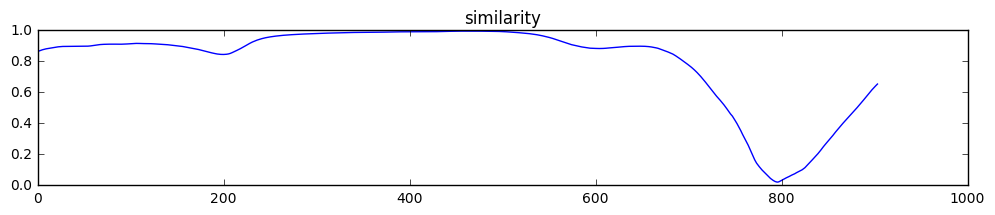

In [164]:
data_dir = root_dir + "/data_0134/smooth_mean_interpolate_bin_mean/"
original_temp(data_dir)

/home/happyling/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


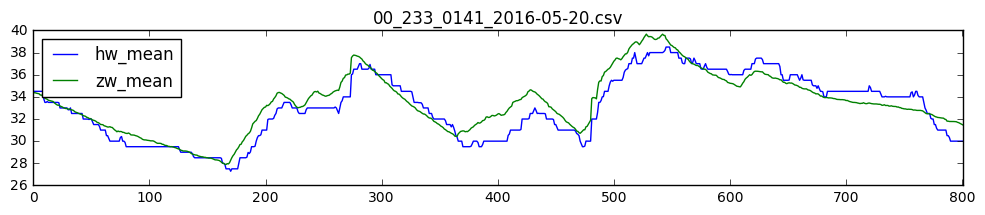

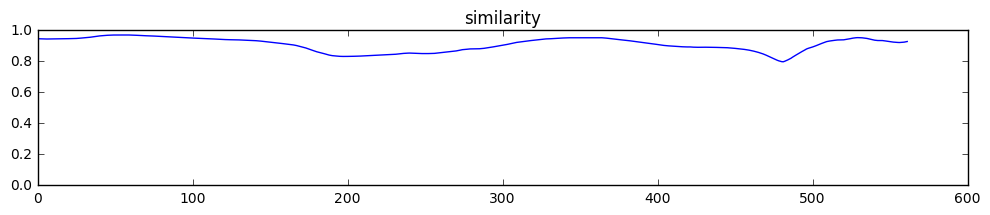

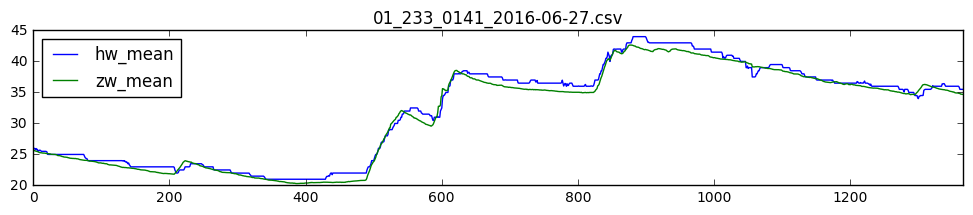

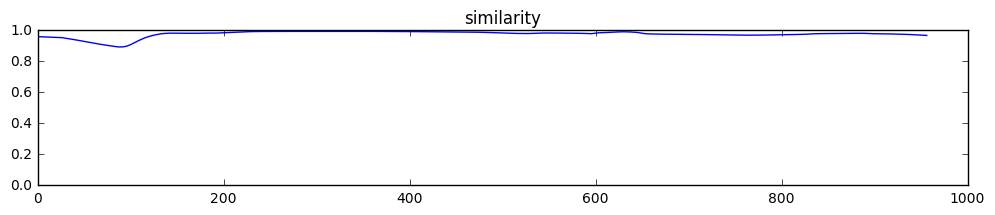

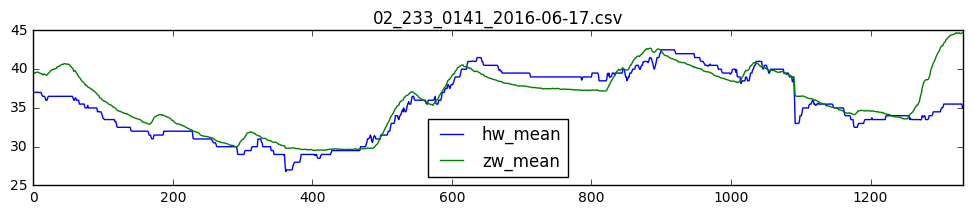

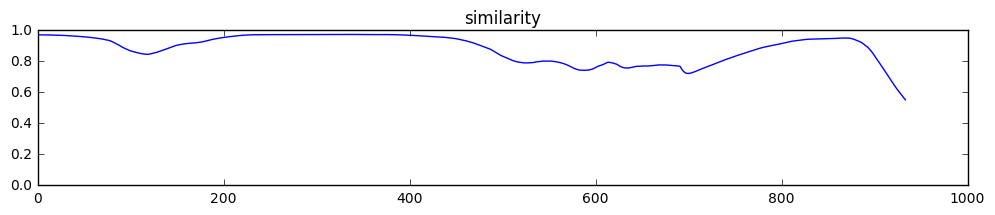

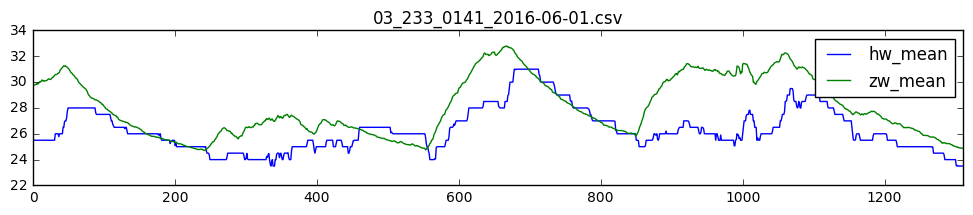

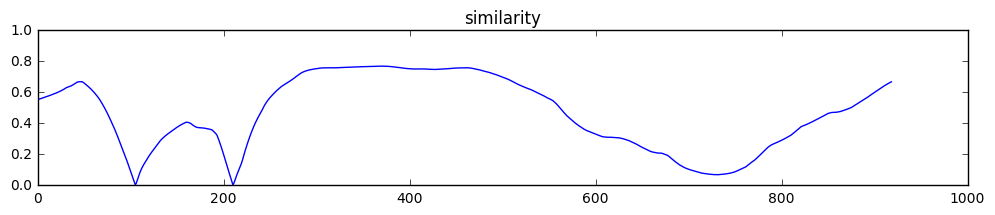

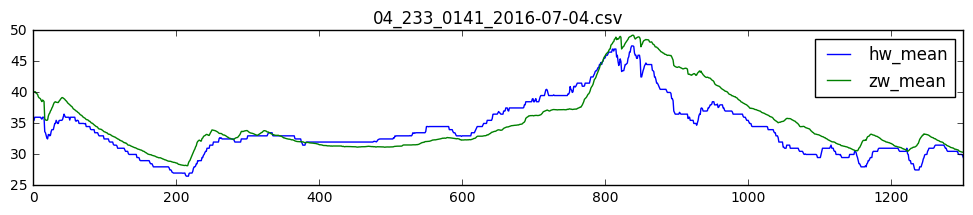

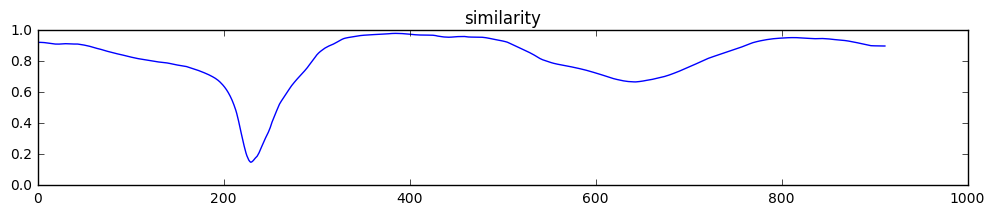

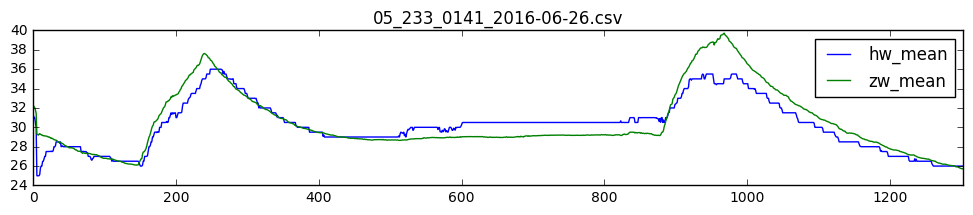

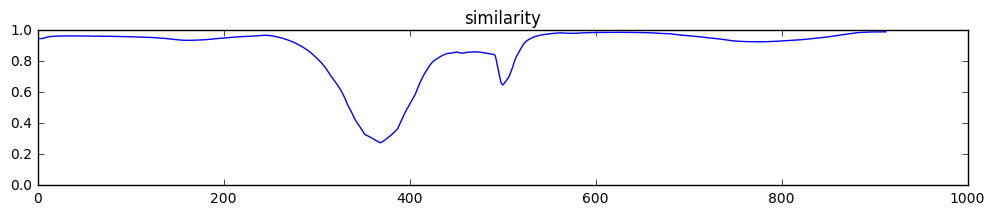

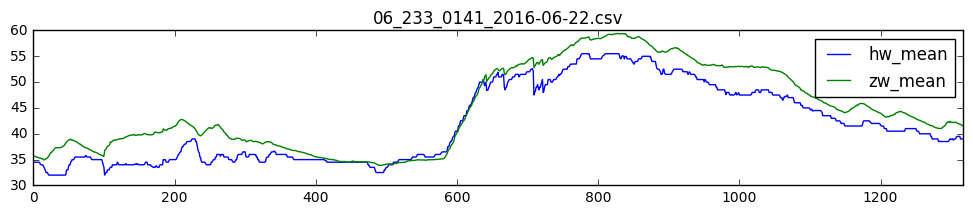

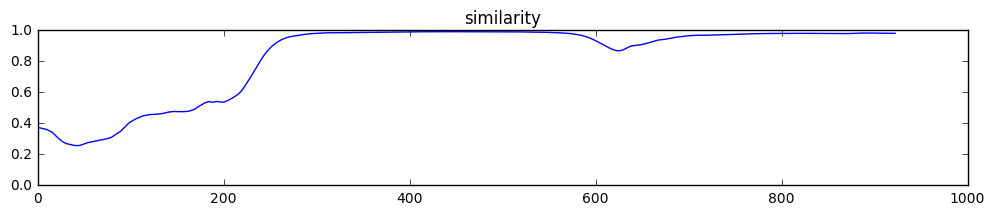

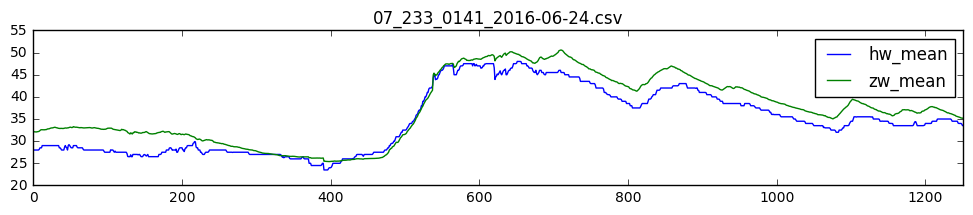

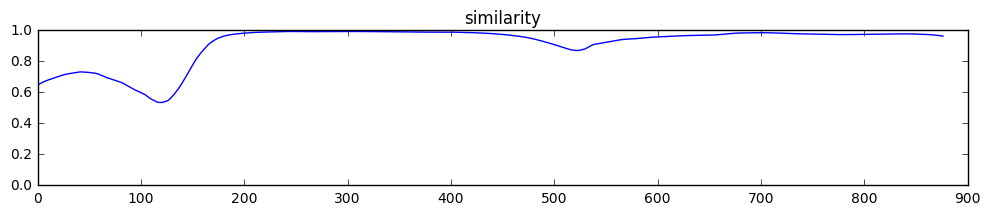

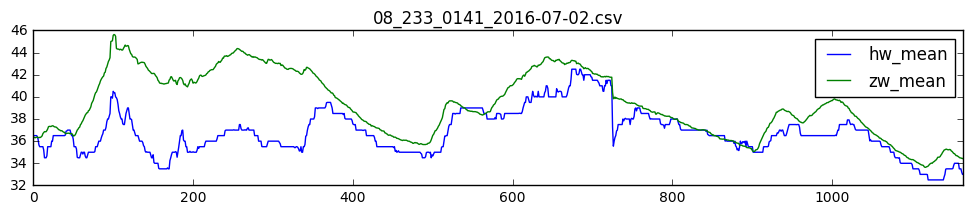

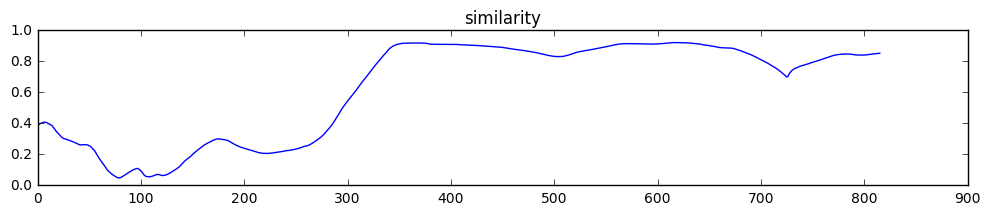

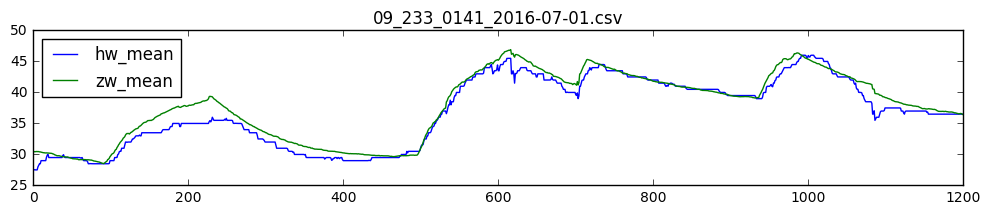

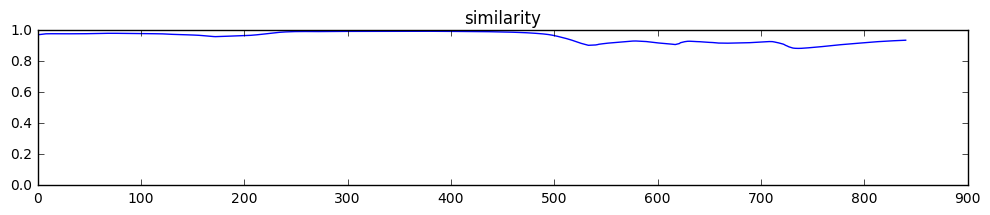

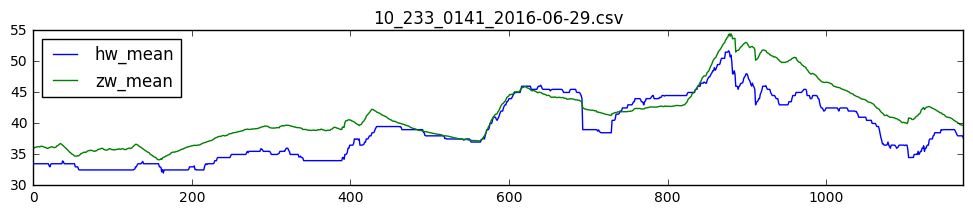

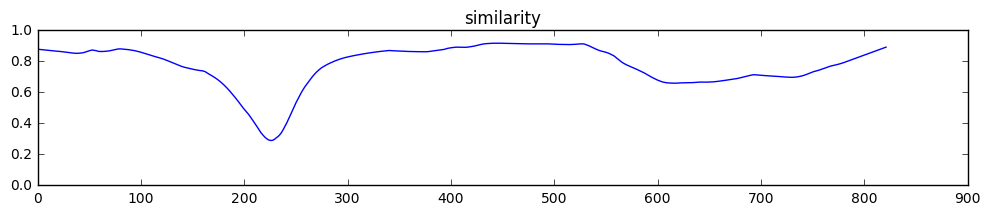

In [165]:
data_dir = root_dir + "/data_0141/smooth_mean_interpolate_bin_mean/"
original_temp(data_dir)

/home/happyling/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


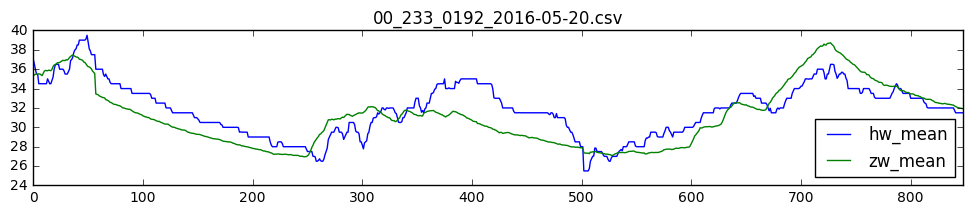

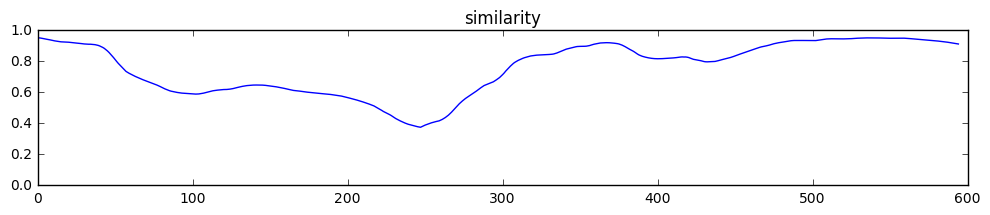

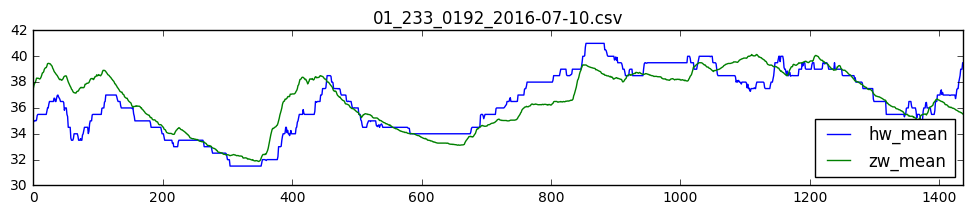

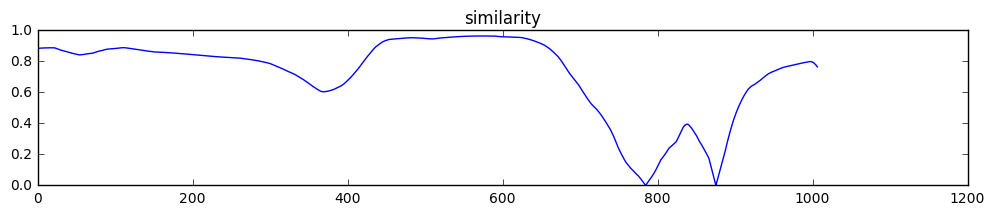

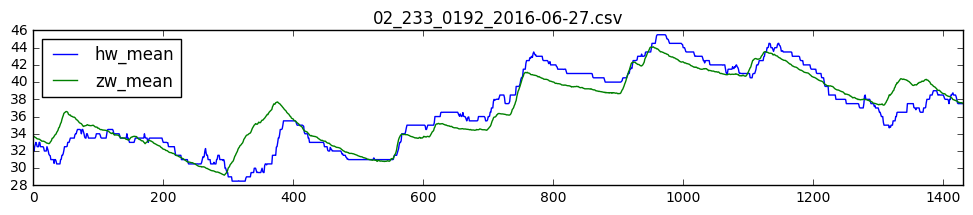

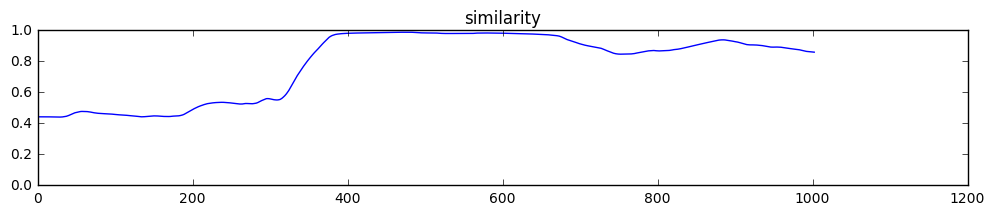

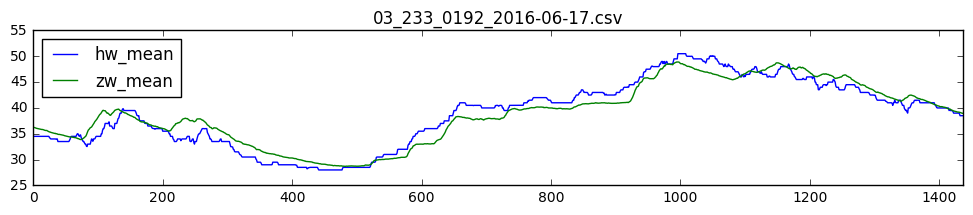

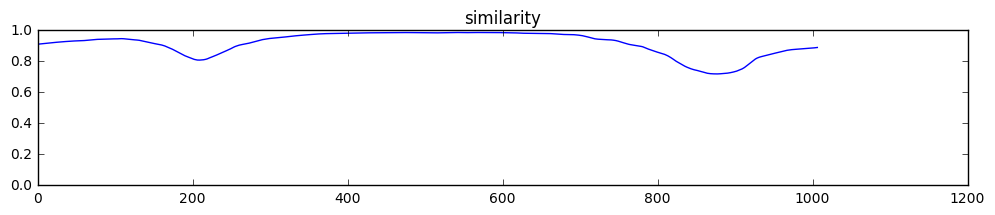

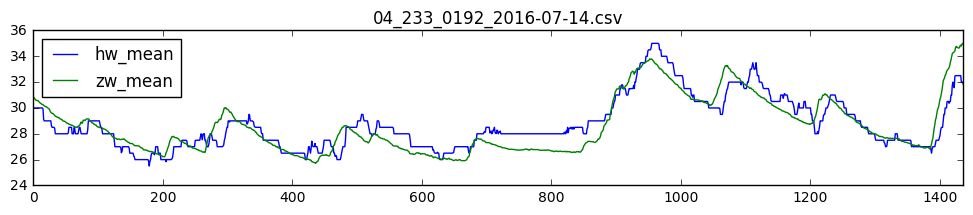

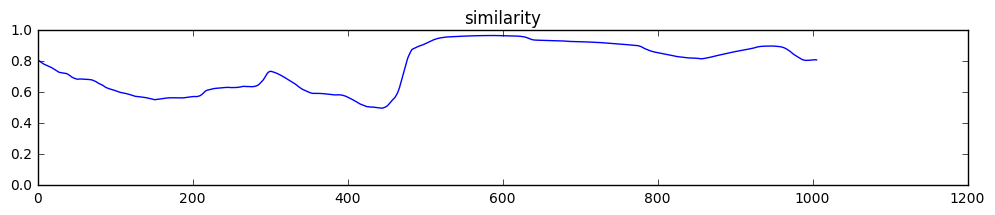

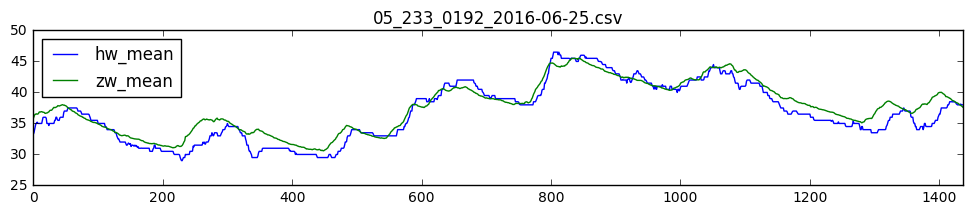

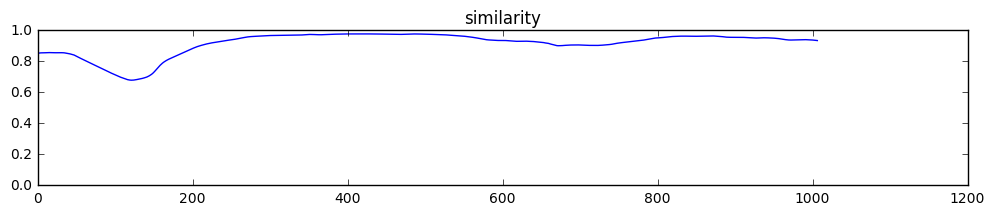

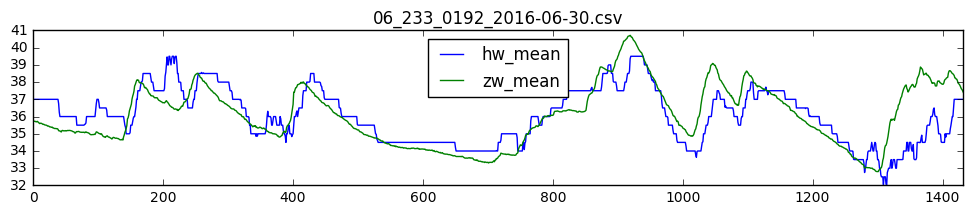

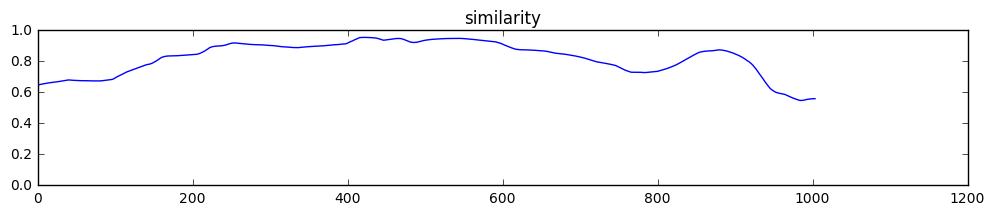

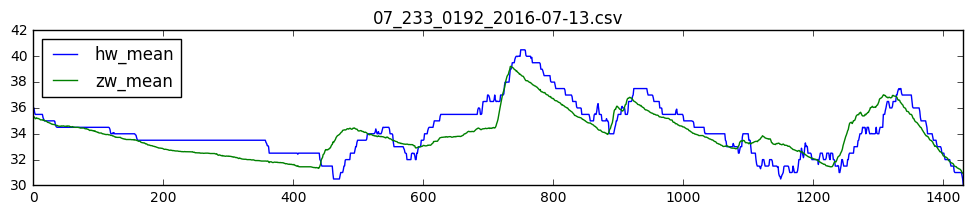

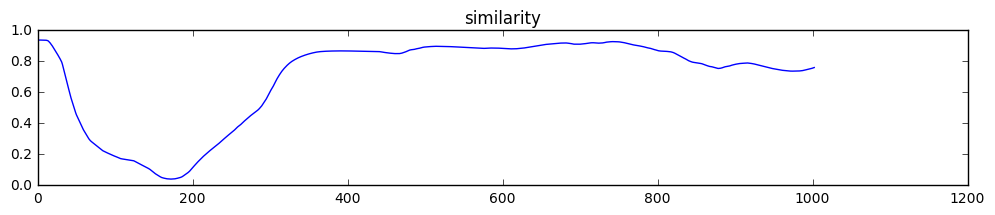

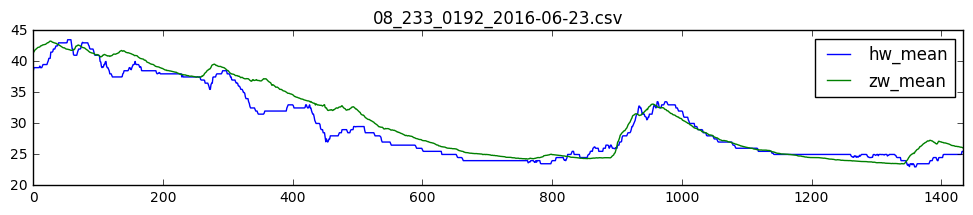

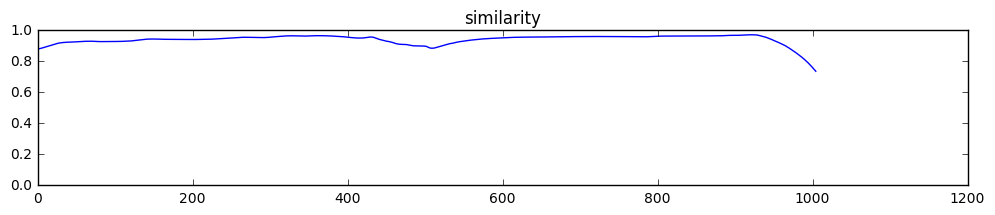

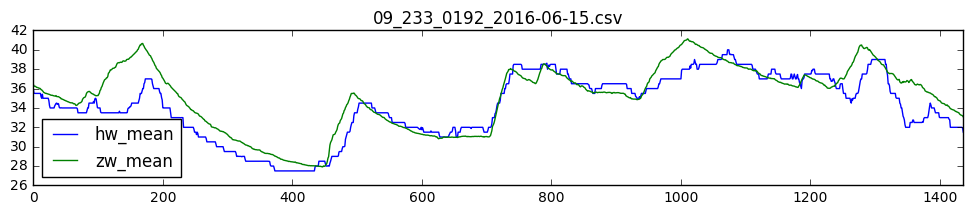

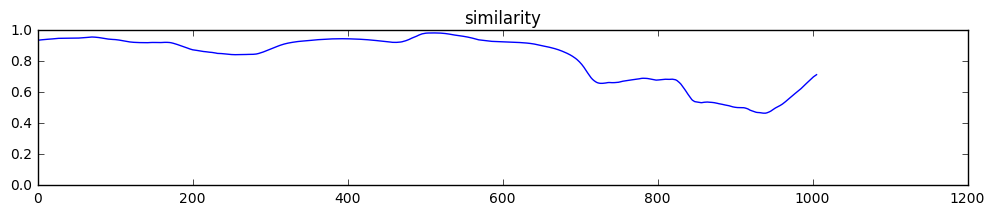

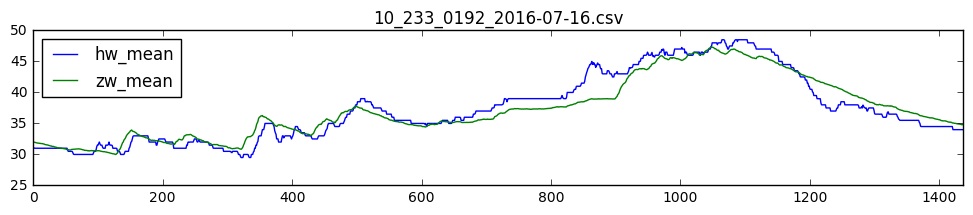

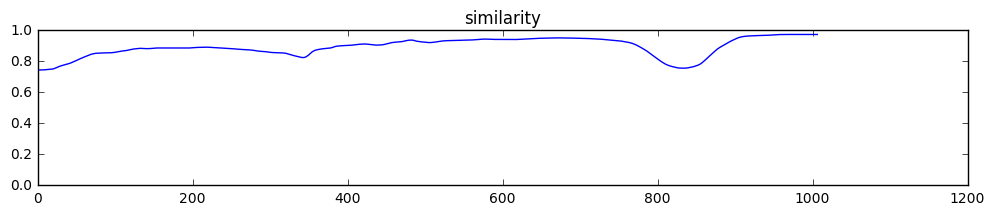

In [166]:
data_dir = root_dir + "/data_0192/smooth_mean_interpolate_bin_mean/"
original_temp(data_dir)

/home/happyling/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


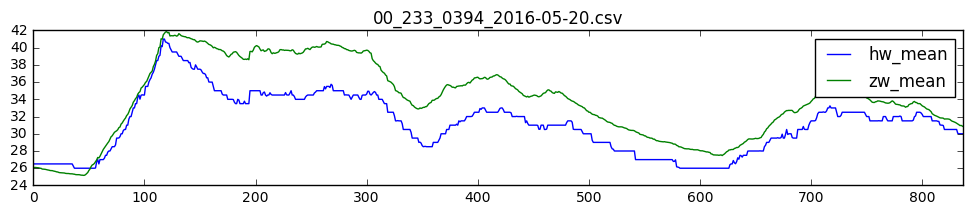

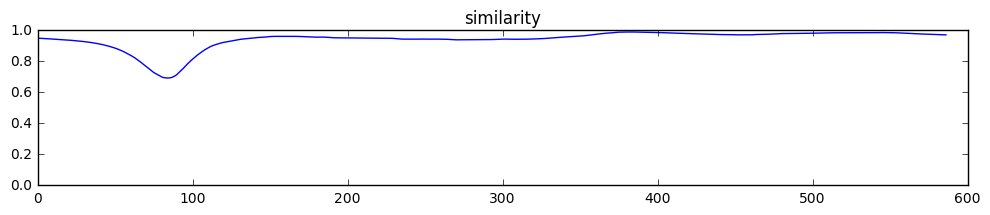

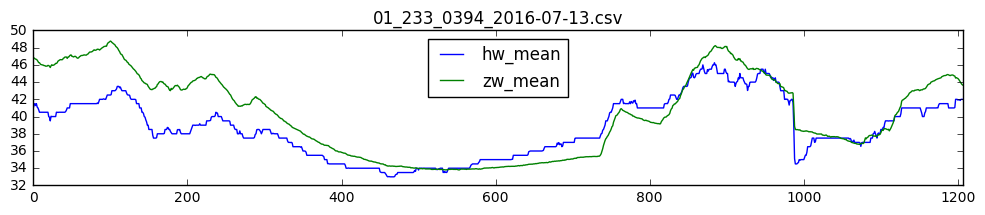

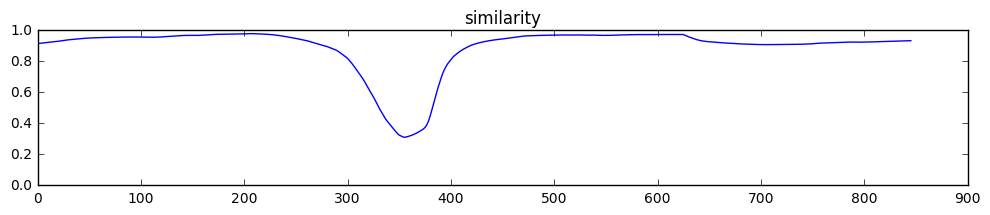

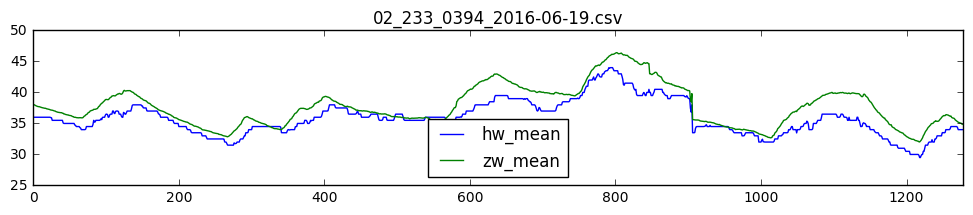

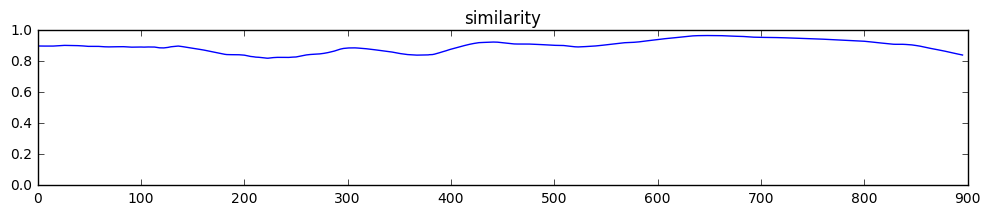

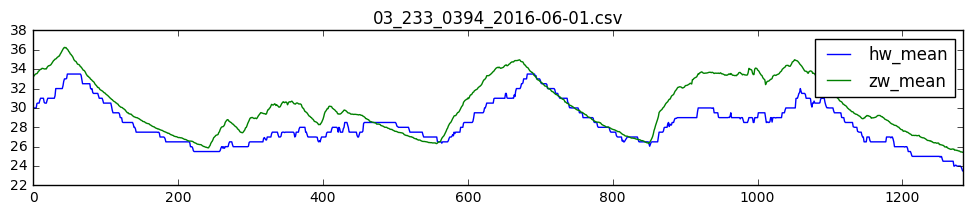

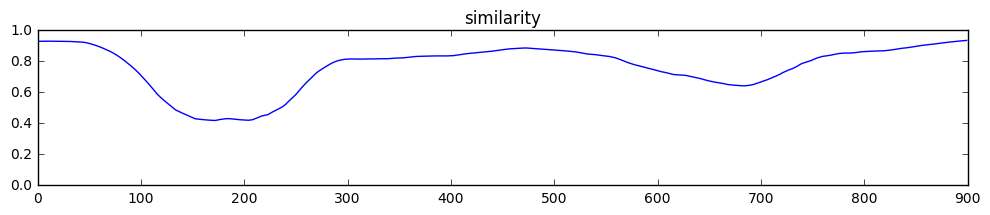

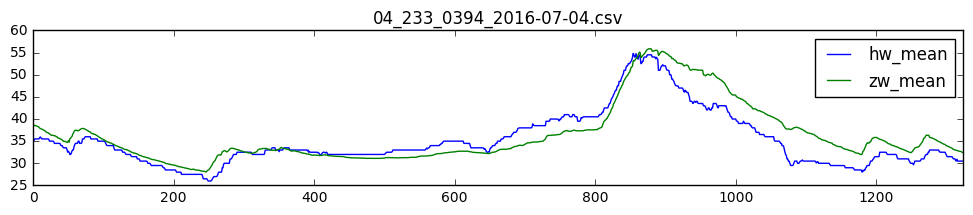

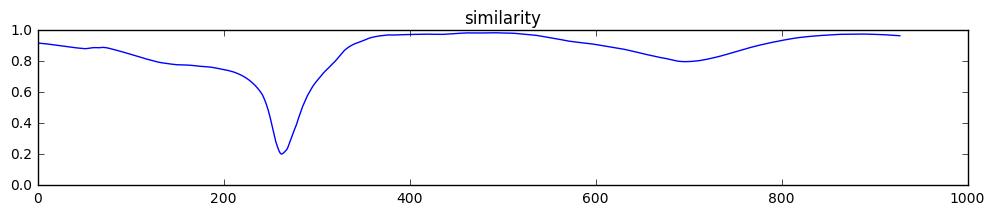

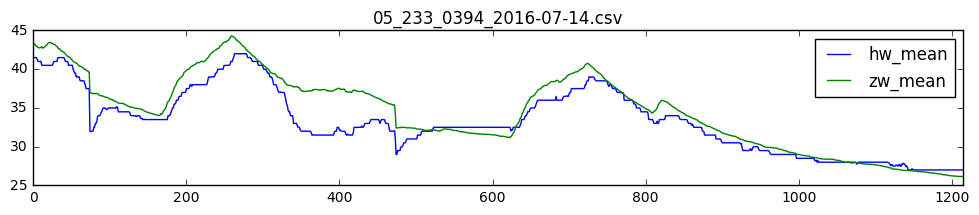

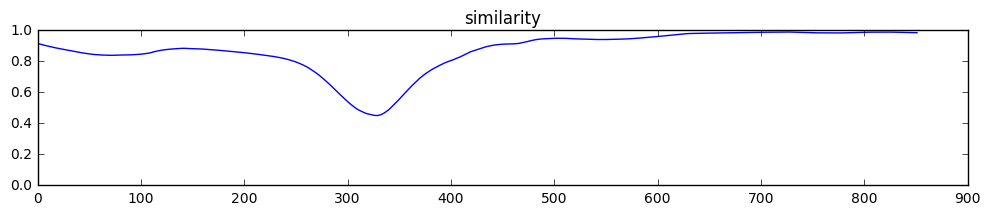

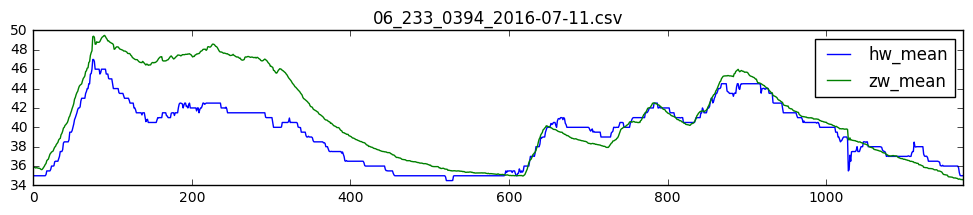

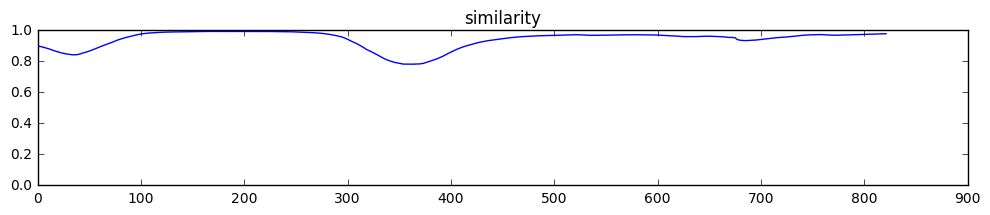

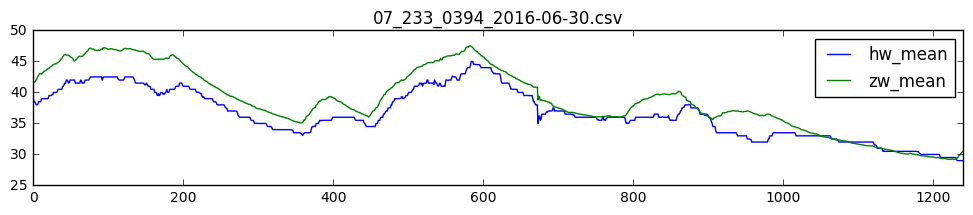

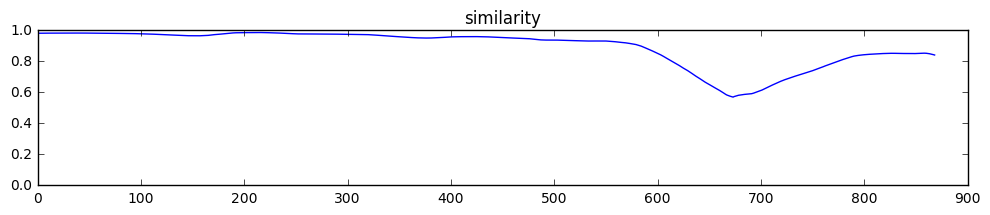

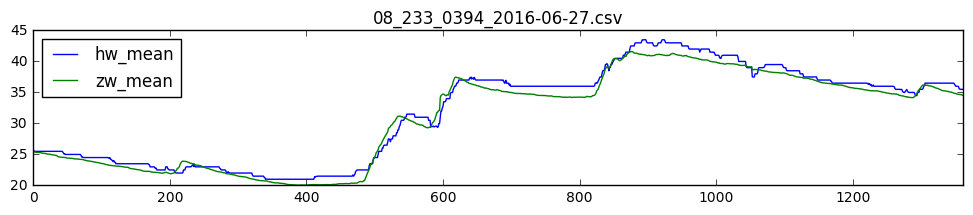

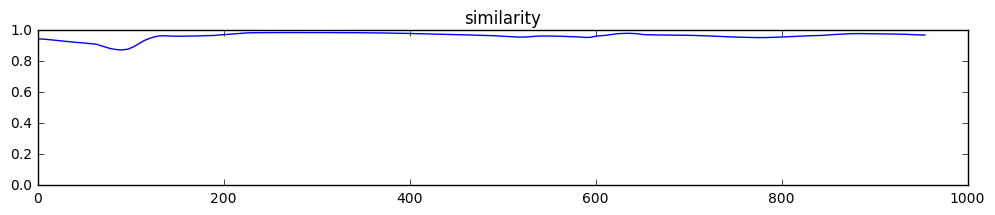

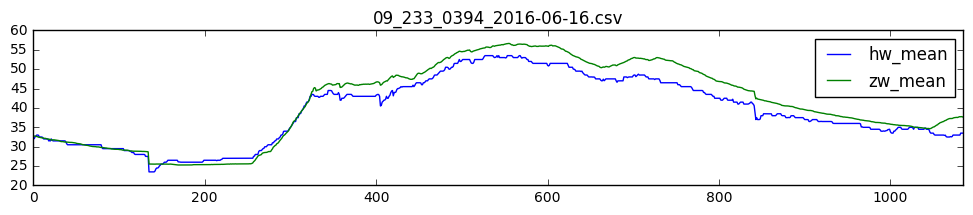

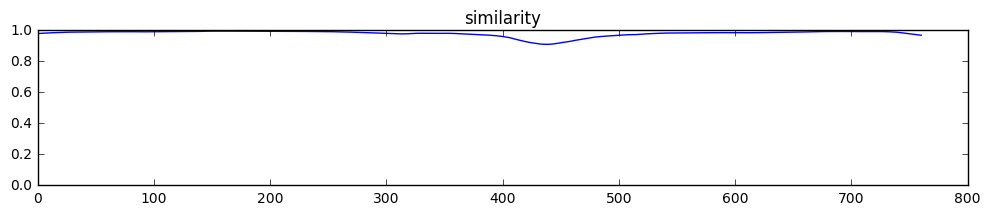

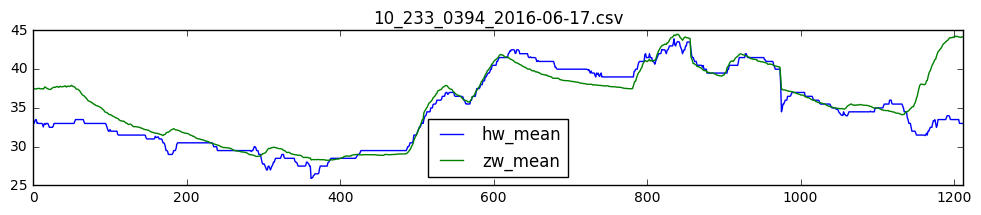

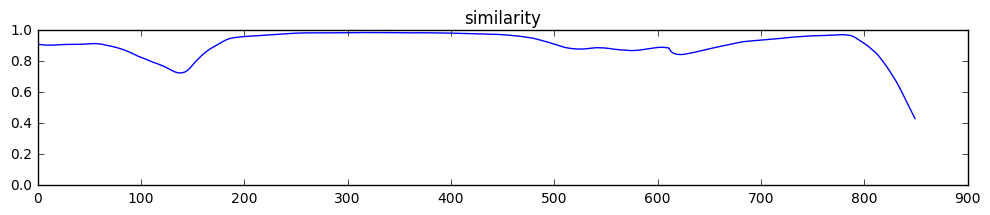

In [167]:
data_dir = root_dir + "/data_0394/smooth_mean_interpolate_bin_mean/"
original_temp(data_dir)

/home/happyling/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


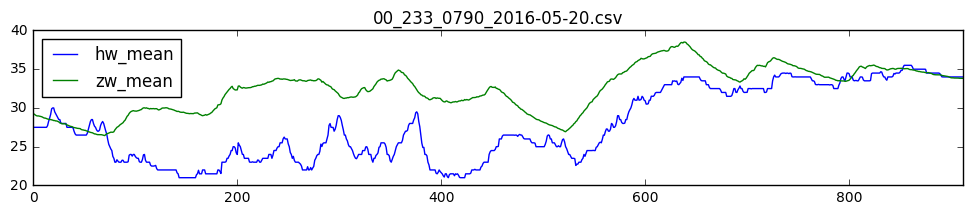

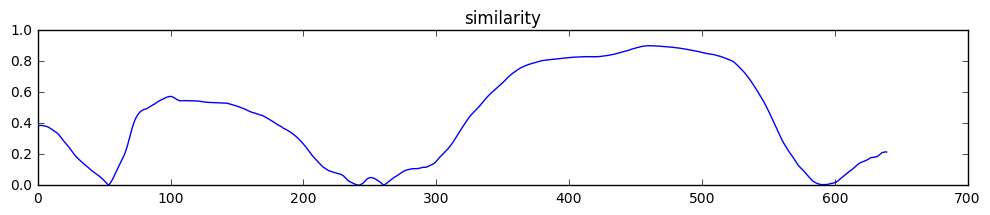

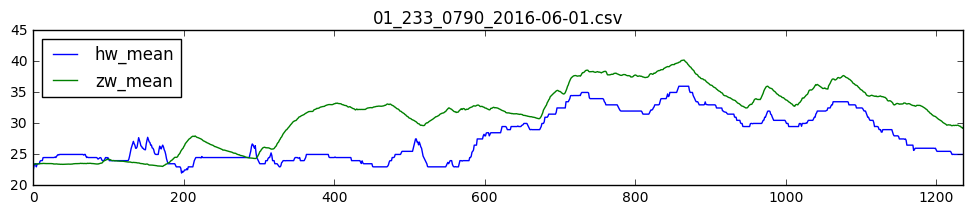

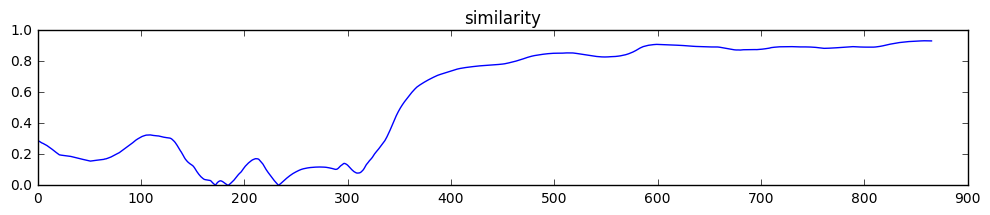

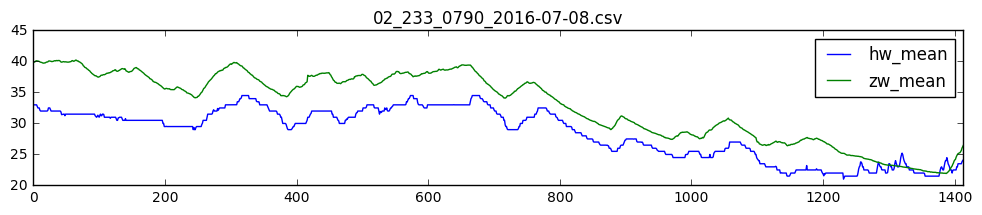

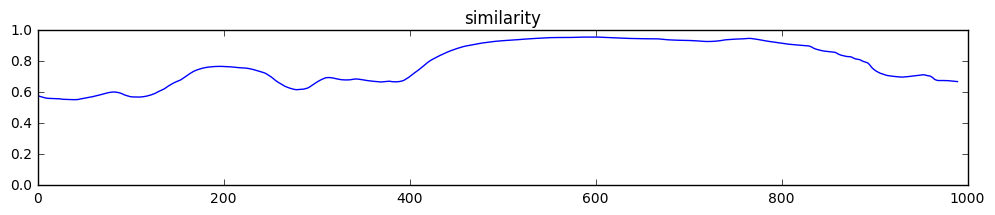

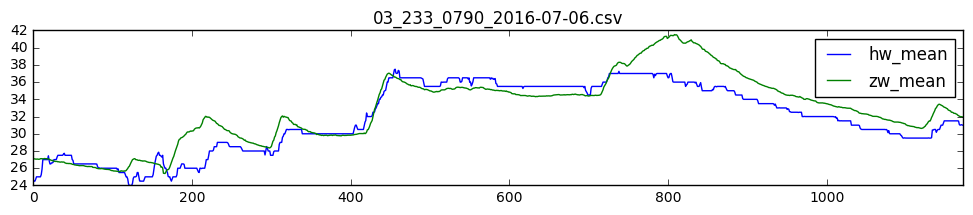

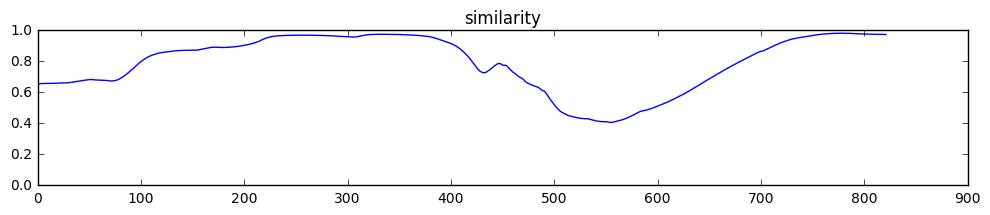

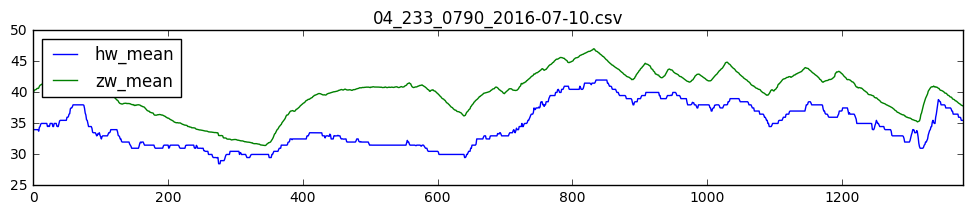

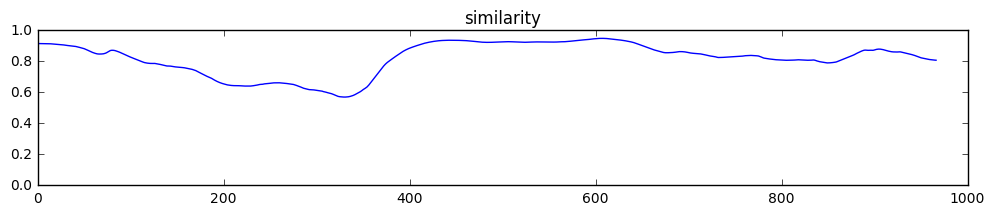

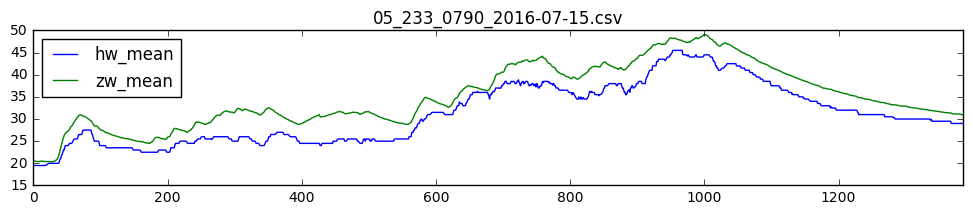

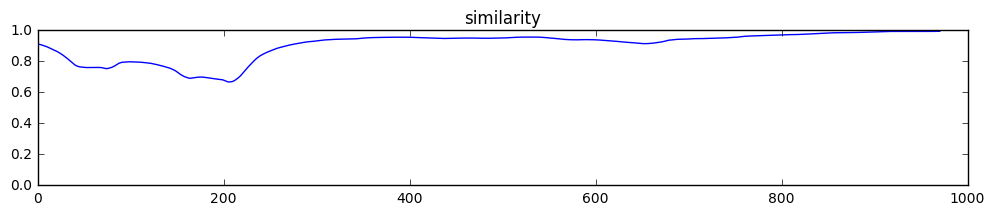

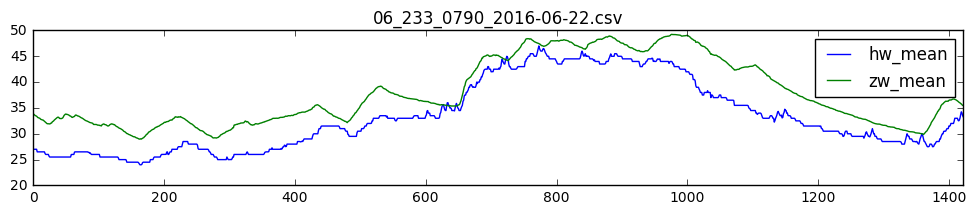

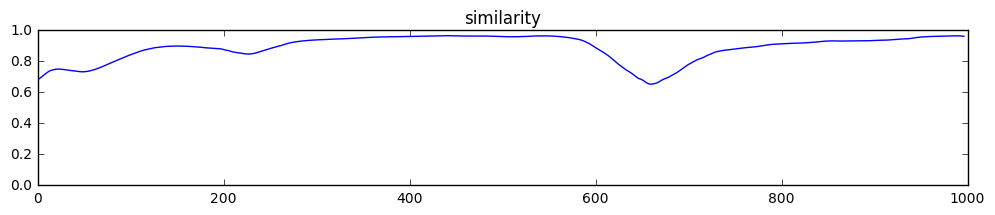

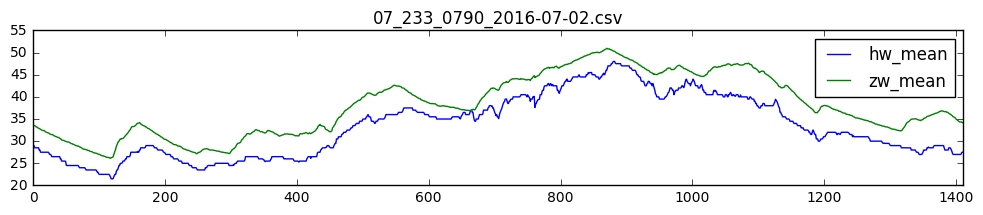

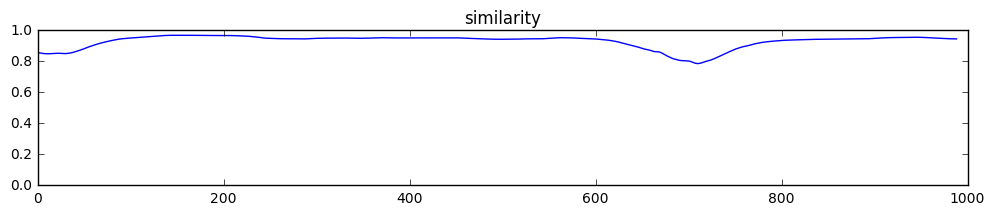

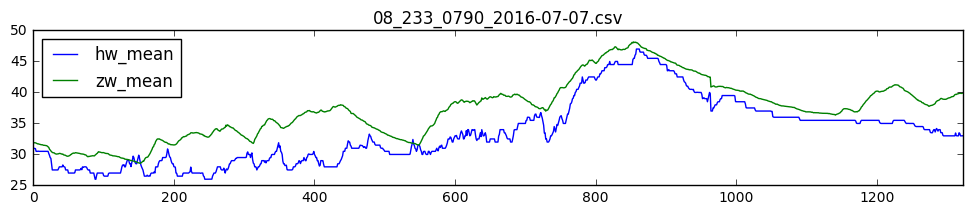

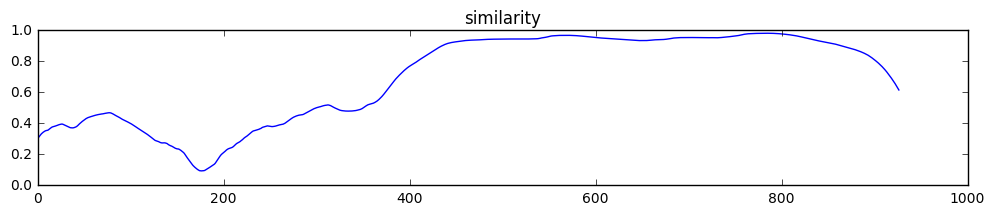

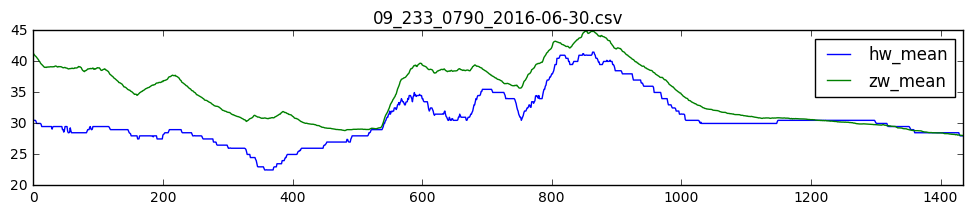

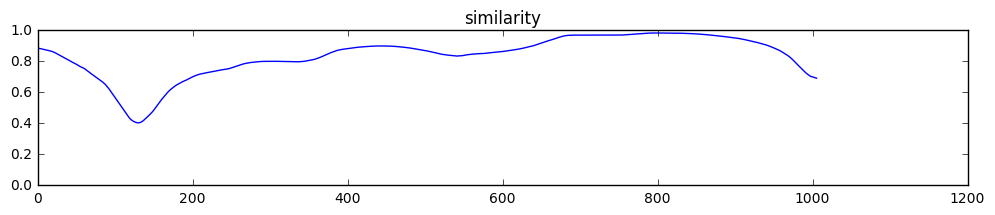

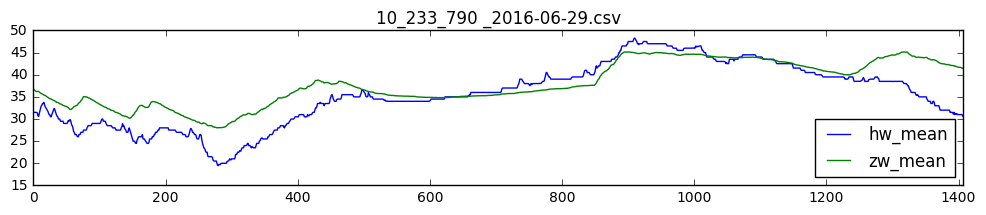

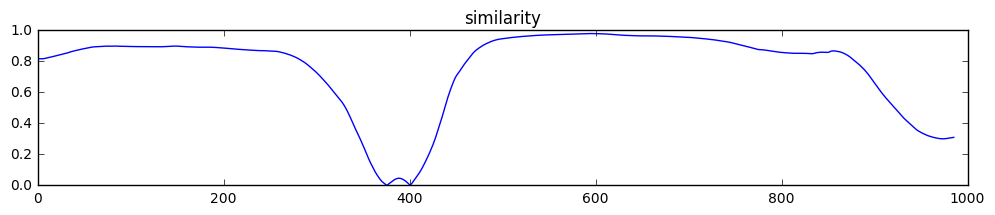

In [168]:
data_dir = root_dir + "/data_0790/smooth_mean_interpolate_bin_mean/"
original_temp(data_dir)

In [155]:
def diff_temp(data_dir, win_rate = 0.5):
    filelist = base.get_files_csv(data_dir)
    for file in filelist:
        path = data_dir + file
        df= integrate.get_temp_mean(path)
        df = df.diff( int(0.1*len(df)) )
        df = (df-df.mean())/(df.std())
        plot_data(df, file)
        plt.figure(figsize=(12,2))
        corr = np.array(integrate.get_piece_corr_rolling(df, int(len(df)*win_rate)))
        corr -= 1
        plt.plot(corr)
        plt.title("similarity")
        plt.ylim((0, 1))

/home/happyling/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


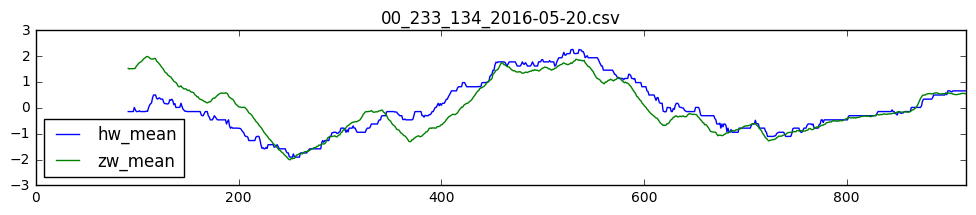

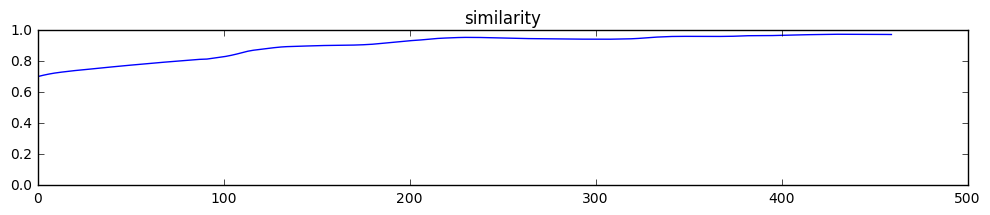

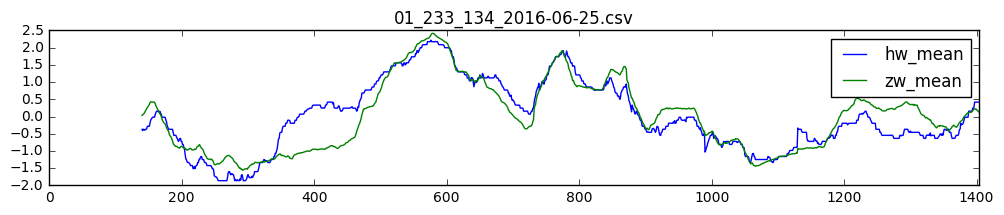

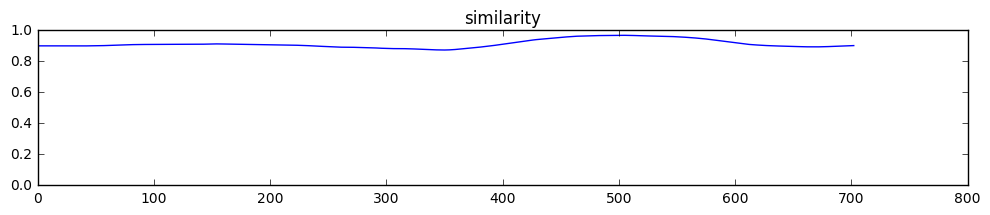

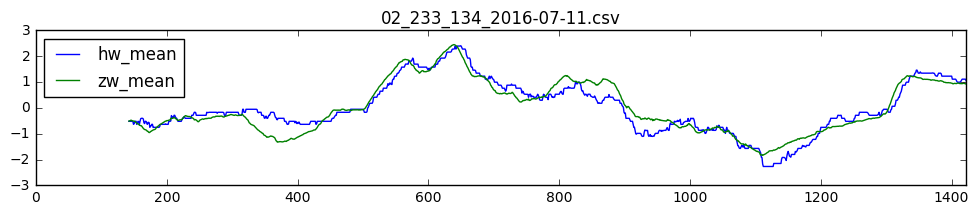

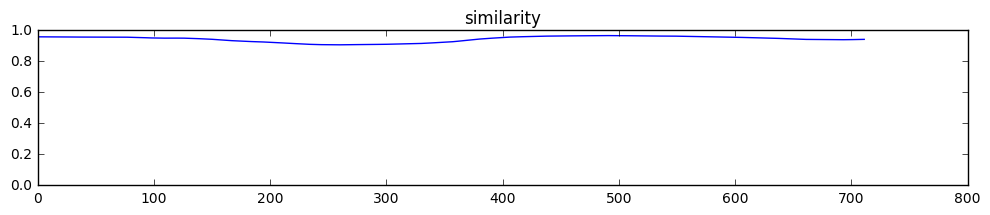

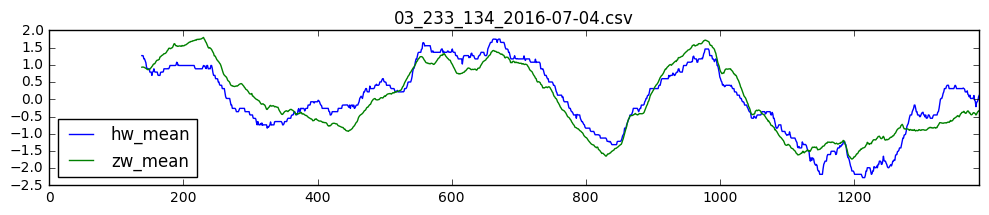

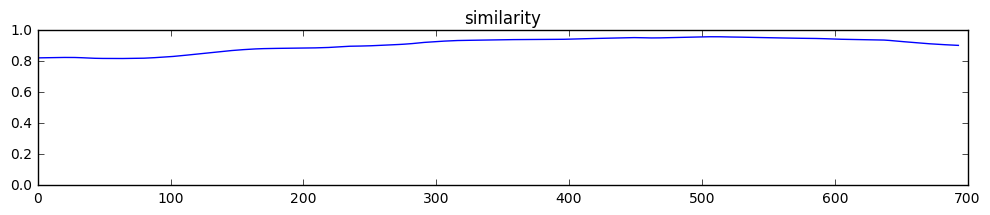

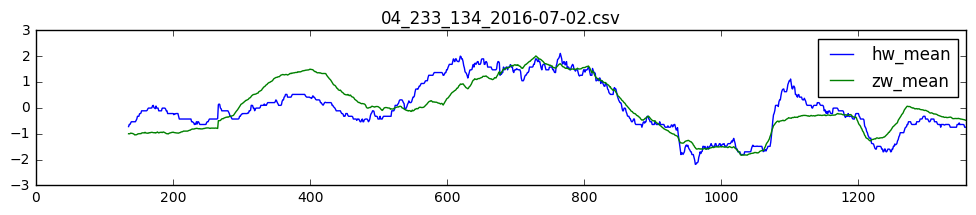

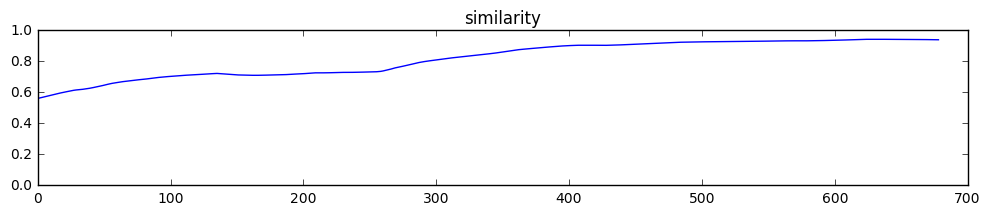

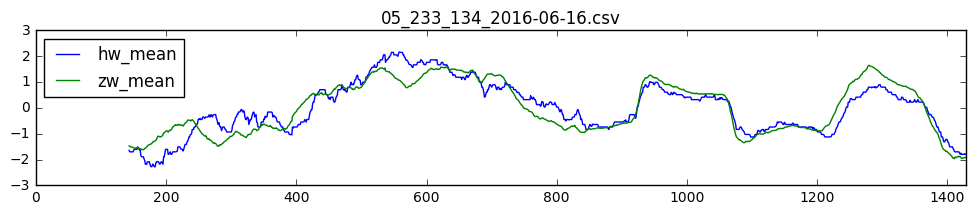

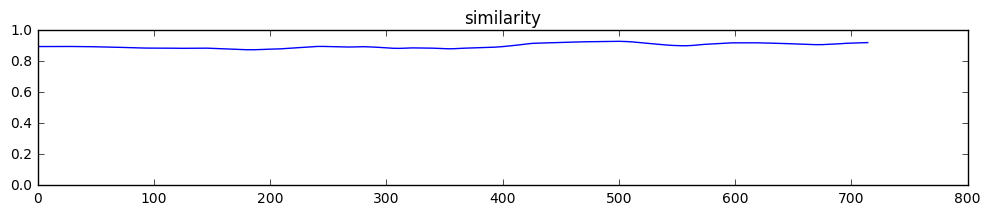

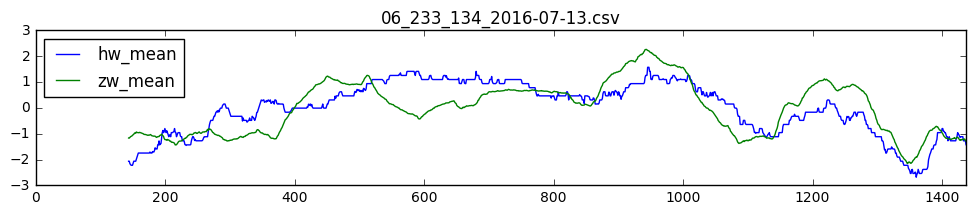

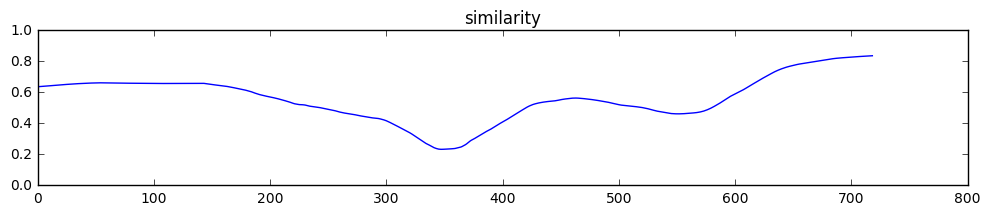

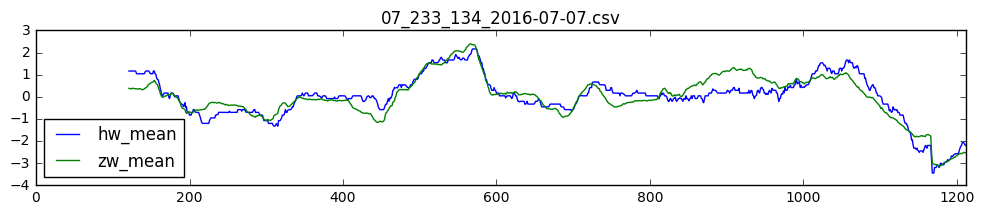

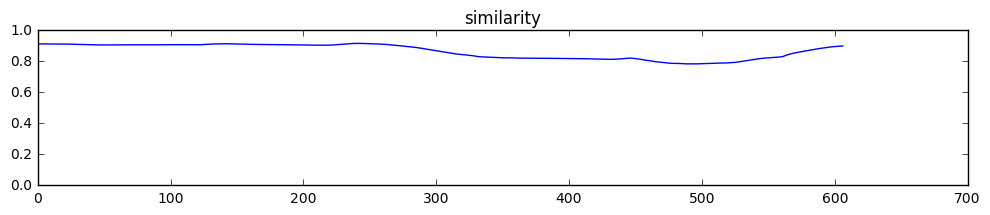

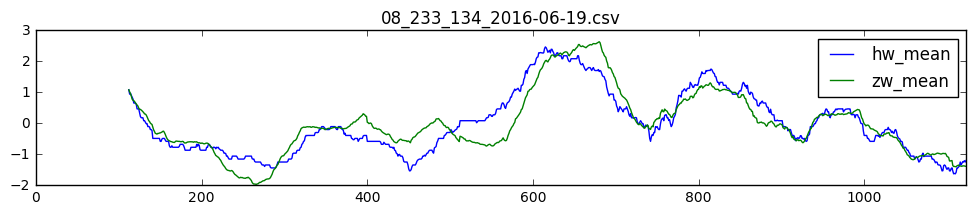

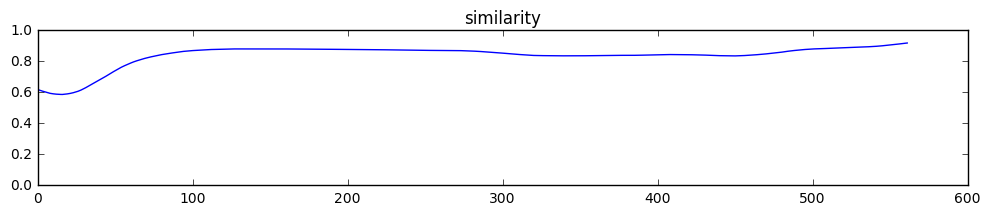

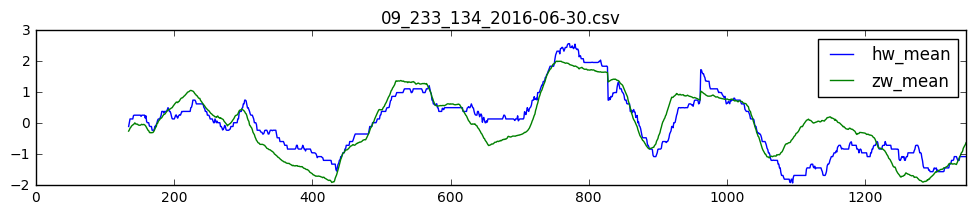

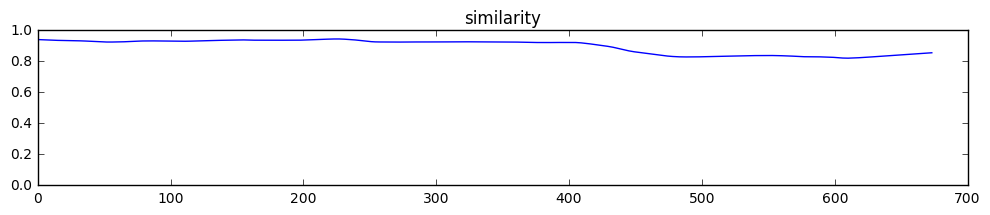

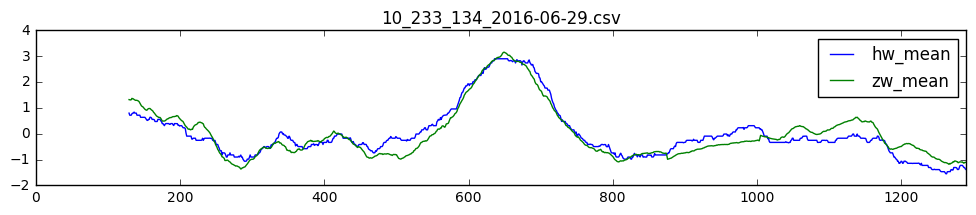

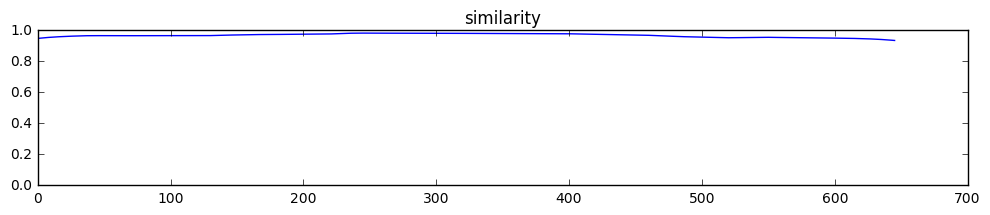

In [156]:
data_dir = root_dir + "/data_0134/smooth_mean_interpolate_bin_mean/"
diff_temp(data_dir)

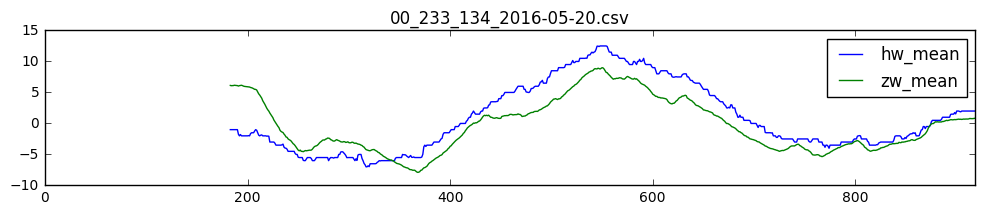

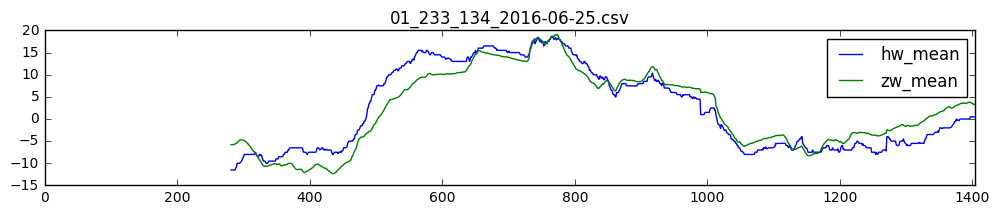

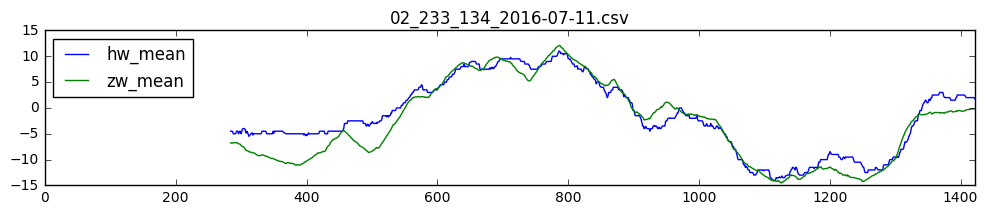

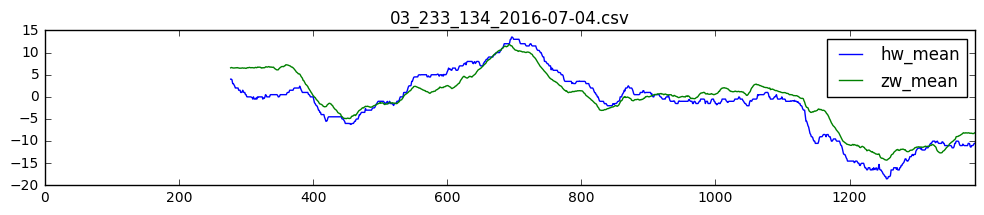

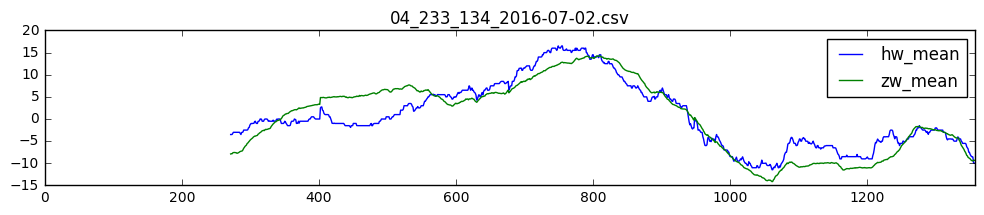

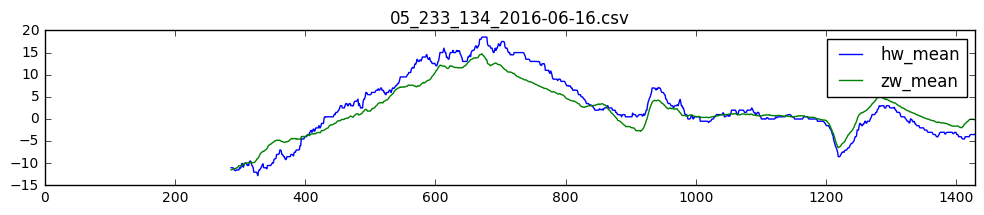

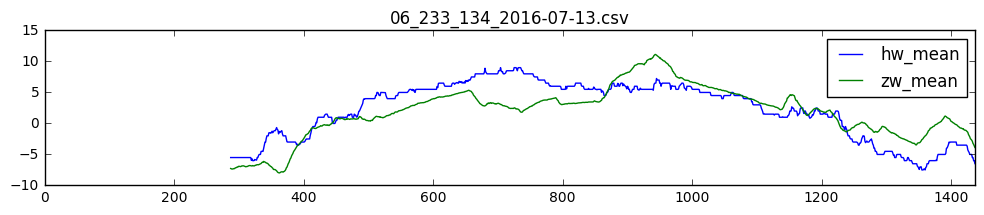

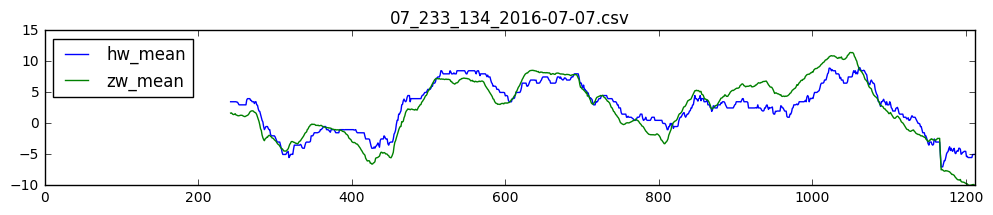

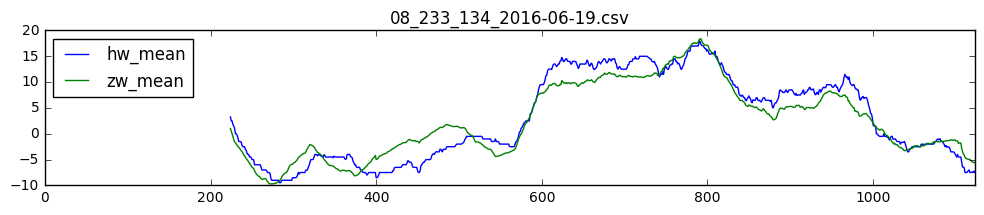

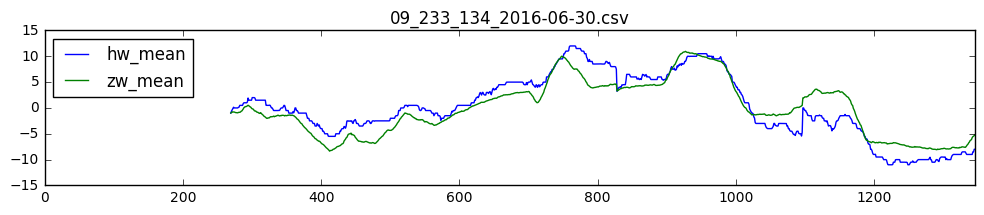

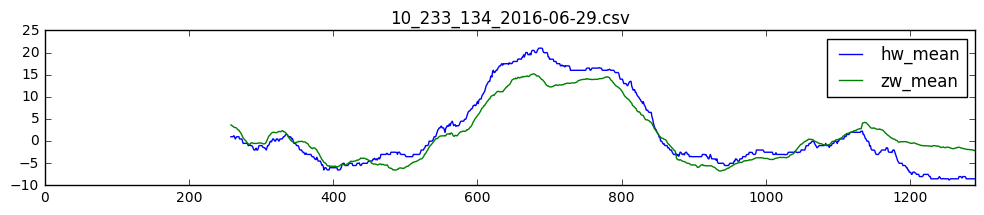

In [150]:
data_dir = root_dir + "/data_0134/smooth_mean_interpolate_bin_mean/"
filelist = base.get_files_csv(data_dir)
for file in filelist:
    data = integrate.get_temp_mean(data_dir+file)
    data = data.diff( int(0.2*len(data)) )
    ax = data.plot(figsize=(12, 2))
    ax.set_title(file)